### TODO 根据栽培棉中发生渐渗的频率，对渐渗片段进行分类

> 建英师兄目录下对IS windows分类的文件有点问题，我进行了重新分类；
> 
> 相应的渐渗区间就是有1Mb的误差

In [2]:
import pandas as pd

In [46]:
All_IS_windows=[]
for Chr in range(1,14,1):
    AtChr="HC04_A{}".format( str(Chr).rjust(2,'0'))
    DtChr="HC04_D{}".format( str(Chr).rjust(2,'0'))
    Chrom_matrix_At=pd.read_csv( 
        "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/Wild_to_Cultivar/comp_matrix.Wild-{}.txt".format(
            AtChr
        ),
        header=0,index_col=0,sep="\t"
    )
    Chrom_matrix_Dt=pd.read_csv(
        "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/Wild_to_Cultivar/comp_matrix.Wild-{}.txt".format(
            DtChr
        ),
        header=0,index_col=0,sep="\t"
    )
    for index in  range(0,Chrom_matrix_At.shape[1],1):
        windowData= Chrom_matrix_At.iloc[:,index:index+1]
        Start=int(Chrom_matrix_At.columns[index])
        End=Start+1000000
        Is_sample=[i for i in windowData.T.values[0] if not pd.isna(i)]
        Is_sampleCount=len(Is_sample)
        All_IS_windows.append( 
            (AtChr,Start,End,Is_sampleCount,",".join(Is_sample))
        )
    for index in  range(0,Chrom_matrix_Dt.shape[1],1):
        windowData= Chrom_matrix_Dt.iloc[:,index:index+1]
        Start=int(Chrom_matrix_Dt.columns[index])
        End=Start+1000000
        Is_sample=[i for i in windowData.T.values[0] if not pd.isna(i)]
        Is_sampleCount=len(Is_sample)
        All_IS_windows.append( 
            (DtChr,Start,End,Is_sampleCount,",".join(Is_sample))
        )
All_IS_windows=pd.DataFrame(All_IS_windows)   
All_IS_windows=All_IS_windows.loc[ 
    All_IS_windows[3]>0
]
All_IS_windows.to_csv(
    "All_Is_window_v2.txt",
    header=False,index=False,sep="\t"
)

#### 统计每条染色体中三种类型IS片段的比例
+ Majory
+ polymorphic
+ Signleteon

In [3]:
All_IS_window=pd.read_csv(
    "./All_Is_window_v2.txt",
    header=None,index_col=None,sep="\t"
)

In [4]:
#! 评估每类野生种对每个渐渗片段的贡献
wildSampleMap={ 
    "HW04":"Ghpunctatum","P04":"Ghpunctatum",
    "TW007":"Ghpunctatum","TW029":"Ghpunctatum","TW031":"Ghpunctatum",
    "HW06":"Ghmorrilli","TW134":"Ghmorrilli",
    "HW02":"Ghmariegalante","P02":"Ghmariegalante","TW064":"Ghmariegalante",
    "TW100":"Ghmariegalante",
    "HW03":"Ghpalmeri","TW026":"Ghpalmeri",
    "P38":"Ghpurpurascen",
    "P01":"Ghyucatanense","TW075":"Ghyucatanense","TW077":"Ghyucatanense",
    "HW07":"Ghrichmondi","TW055":"Ghrichmondi","TW094":"Ghrichmondi",
    "HW05":"Ghlatifolium","TW013":"Ghlatifolium","TW091":"Ghlatifolium"    
}

In [5]:
All_IS_window

,0,1,2,3,4
0,HC04_A01,0,1000000,36,"TW091,TW026,TW091,TW026,TW026,TW026,TW091,TW09..."
1,HC04_A01,1000000,2000000,32,"HW07,HW05,TW026,HW05,TW026,HW05,TW026,TW026,TW..."
2,HC04_A01,2000000,3000000,21,"TW031,TW031,TW091,HW03,TW091,TW031,HW03,TW031,..."
3,HC04_A01,3000000,4000000,30,"HW05,TW064,TW064,HW06,TW064,TW064,P01,TW064,TW..."
4,HC04_A01,4000000,5000000,35,"TW013,TW064,HW05,TW064,TW064,TW064,TW055,TW064..."
...,...,...,...,...,...
1412,HC04_D13,60000000,61000000,30,"TW029,TW029,TW055,TW029,TW029,TW029,TW029,TW02..."
1413,HC04_D13,61000000,62000000,34,"TW091,TW091,TW091,TW091,HW03,TW091,TW091,HW03,..."
1414,HC04_D13,62000000,63000000,11,"TW031,HW05,HW05,HW05,HW05,HW05,TW031,TW031,HW0..."
1415,HC04_D13,63000000,64000000,3,"TW134,HW06,TW134"


In [11]:
QTLStatData=[]
for val in All_IS_window.values:
    #! 总共8类野生棉，对应多少36个栽培种
    QTLData={ 
        "Ghlatifolium":0,"Ghmariegalante":0,"Ghmorrilli":0,"Ghpalmeri":0,
        "Ghpunctatum":0,"Ghpurpurascen":0,"Ghrichmondi":0,"Ghyucatanense":0
    }
    for wild in val[4].split(","):
            wildClass=wildSampleMap.get(wild)
            QTLData[wildClass]=QTLData.get(wildClass,0)+1
    #* 不是野生棉片段的样本数目
    nowildCount=36-sum(QTLData.values())
    QTLData['nowildCount']=nowildCount
    #! 填充信息
    sampleCount=[]
    for key in ['Ghlatifolium', 'Ghmariegalante', 'Ghmorrilli', 'Ghpalmeri', 'Ghpunctatum',
                'Ghpurpurascen', 'Ghrichmondi', 'Ghyucatanense','nowildCount']:
        sampleCount.append( 
            QTLData.get(key)
        )
    QTLStatData.append(
        list(val[0:5])+sampleCount
    )
QTLStatData=pd.DataFrame(QTLStatData)
# QTLStatData=QTLStatData.sort_values(
#     by=[5,6,7,8,9,10,11,12,13]
# ) 

In [12]:
QTLStatData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,HC04_A01,0,1000000,36,"TW091,TW026,TW091,TW026,TW026,TW026,TW091,TW09...",12,2,0,16,6,0,0,0,0
1,HC04_A01,1000000,2000000,32,"HW07,HW05,TW026,HW05,TW026,HW05,TW026,TW026,TW...",11,1,0,18,0,0,1,1,4
2,HC04_A01,2000000,3000000,21,"TW031,TW031,TW091,HW03,TW091,TW031,HW03,TW031,...",5,0,0,5,11,0,0,0,15
3,HC04_A01,3000000,4000000,30,"HW05,TW064,TW064,HW06,TW064,TW064,P01,TW064,TW...",1,21,5,0,1,0,0,2,6
4,HC04_A01,4000000,5000000,35,"TW013,TW064,HW05,TW064,TW064,TW064,TW055,TW064...",3,25,0,0,2,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,HC04_D13,60000000,61000000,30,"TW029,TW029,TW055,TW029,TW029,TW029,TW029,TW02...",6,0,1,0,15,0,8,0,6
1413,HC04_D13,61000000,62000000,34,"TW091,TW091,TW091,TW091,HW03,TW091,TW091,HW03,...",16,0,2,11,4,0,0,1,2
1414,HC04_D13,62000000,63000000,11,"TW031,HW05,HW05,HW05,HW05,HW05,TW031,TW031,HW0...",6,0,2,0,3,0,0,0,25
1415,HC04_D13,63000000,64000000,3,"TW134,HW06,TW134",0,0,3,0,0,0,0,0,33


In [13]:
QTLStatData.to_csv( 
    "./All_Is_window_v2.txt",
    header=False,index=False,sep="\t"
)

### TODO 渐渗区域相比于其他区域是否包含更高比例的hyper序列

In [87]:
import pandas as pd 
import sys 
import re 
import logging
logging.basicConfig(
    level=logging.INFO
)
#* 导入所需要的包
#* 导入所需要的包
sys.path.append("/public/home/zpliu/Pan-genome/SV_parallele_V2/GenomeCompare")
from divergenceRegion.bedtools import intersectBed,merge_bed

In [2]:
A2_At_windows=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/A2_At_AllwindowAnnotate.txt",
    header=None,index_col=None,sep="\t"
)
D5_Dt_windows=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/D5_Dt_AllwindowAnnotate.txt",
    header=None,index_col=None,sep="\t"
)

#* 将渐渗区间与其他windows进行交集
At_Allwindows=A2_At_windows.loc[A2_At_windows[3]!="."][[3,4,5,6]]
Dt_Allwindows=D5_Dt_windows.loc[D5_Dt_windows[3]!="."][[3,4,5,6]]

In [2]:
#* 几种渐渗区间
Major_IS_At=pd.read_csv( 
    "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/Major_IS_At.bed",
    header=None,index_col=None,sep="\t"
)
Major_IS_Dt=pd.read_csv( 
    "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/Major_IS_Dt.bed",
    header=None,index_col=None,sep="\t"
)
Polymorphic_At=pd.read_csv( 
    "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/Polymorphic_IS_At.bed",
    header=None,index_col=None,sep="\t"
)
Polymorphic_Dt=pd.read_csv( 
    "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/Polymorphic_IS_Dt.bed",
    header=None,index_col=None,sep="\t"
)

Signleteon_IS_At=pd.read_csv(
    "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/Signleteon_IS_At.bed",
    header=None,index_col=None,sep="\t"
)
Signleteon_IS_Dt=pd.read_csv(
    "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/Signleteon_IS_Dt.bed",
    header=None,index_col=None,sep="\t"
)

Polymorphic_At[3]='polymorphic'
Polymorphic_Dt[3]='polymorphic'
Major_IS_At[3]='Major'
Major_IS_Dt[3]='Major'
Signleteon_IS_At[3]='Signleteon'
Signleteon_IS_Dt[3]='Signleteon'

In [3]:
All_IS_windows=pd.concat(
    [ 
        Major_IS_At,
        Major_IS_Dt,
        Polymorphic_At,
        Polymorphic_Dt,
        Signleteon_IS_At,
        Signleteon_IS_Dt
    ],
    axis=0
)


In [62]:
#* 所有渐渗片段所对应的区间
All_IS_windows.to_csv( 
    "./All_Is_window.txt",
    header=None,index=False,sep="\t"
)

In [31]:
AD1_windowAnnotate=pd.concat([ 
    At_Allwindows,
    Dt_Allwindows
])

In [33]:
intersectedData=intersectBed( 
    All_IS_windows,AD1_windowAnnotate
)

In [47]:
outData=[]
for windowAnnotate,windowIntersectedData in intersectedData.groupby([0,1,2,3]):
    windowIntersectedData['sequenceLen']=windowIntersectedData.apply(lambda x:int(x[6])-int(x[5])+1,axis=1)
    sequenceLenDict=dict(windowIntersectedData.groupby([7])['sequenceLen'].sum())
    hyperSeq=sequenceLenDict.get("divergence",0)
    outData.append( 
        list(windowAnnotate)+[hyperSeq]
    )
outData=pd.DataFrame(outData)

In [53]:
outData.groupby([3])[4].mean()

3
Major          254005.914153
Signleteon     248058.268966
polymorphic    277721.397146
Name: 4, dtype: float64

### TODO 评估每个渐渗 windows中是否有相应的GWAS QTLs

+ 实际值与随机抽取的windows相比，渐渗片段所在区间，有更高比例的GWAS QTLs

In [54]:
QTL1=pd.read_csv(
    "/public/home/jqyou/out/pan_genome_out/supplementary_data/HC04_published_QTL.txt",
    header=None,index_col=None,sep="\t"
)
QTL2=pd.read_csv(
    "/public/home/jqyou/out/pan_genome_out/supplementary_data/hg_QTL_new_HC04_V1.txt",
    header=None,index_col=None,sep="\t"
)
QTLs=pd.concat( 
    [QTL1,QTL2],axis=0
)
QTLs[0]=QTLs[0].apply(
    lambda x:"HC04_{}".format(x)
)

In [112]:
a=intersectBed(All_IS_windows,QTLs)
a.loc[a[4]!="."][[0,1,2]].drop_duplicates().shape

(158, 3)

In [87]:
# * 基因组上的所有的windows
NIS_At = pd.read_csv(
    "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/NI_At.bed",
    header=None, index_col=None, sep="\t"
)
NIS_Dt = pd.read_csv(
    "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/NI_Dt.bed",
    header=None, index_col=None, sep="\t"
)
All_windows = pd.concat(
    [
        All_IS_windows[[0, 1, 2]],
        NIS_At,
        NIS_Dt
    ],
    axis=0
)


In [123]:
All_windows.shape,All_IS_windows.shape


((2284, 3), (1417, 4))

In [117]:
randomSet = []
for i in range(0, 1000, 1):
    randomWindow = All_windows.sample(1417, axis=0)
    intersectedData = intersectBed(randomWindow, QTLs)
    window_with_QTL = intersectedData.loc[
        intersectedData[3] != "."
    ][[0, 1, 2]].drop_duplicates().shape
    randomSet.append(
        window_with_QTL
    )


In [118]:
import seaborn as sns

/tmp/ipykernel_10438/117499557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=[i[0] for i in randomSet ], hist=True, kde=False, rug=False )


<AxesSubplot:>

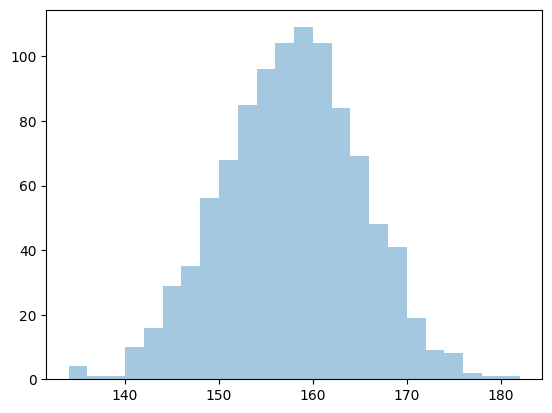

In [122]:
sns.distplot(a=[i[0] for i in randomSet], hist=True, kde=False, rug=False)


###  TODO 将渐渗区间与syntenic genes取交集


In [124]:
import pandas as pd

### TODO 提取亚基因组之间syntenic gene所对应的坐标

> 提取相应syntenic 基因和其所在的坐标

In [107]:
import pandas as pd

In [108]:
#* 位于共线性区域内的同源基因
syntenic_gene = pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/All_genome_pan_gene_V2.txt",
    header=0, index_col=None, sep="\t"
)


In [109]:
#* HC04所在的基因坐标
HC04_gene_bed=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/JCVI/A2_At_Dt_D5/HC04.At_gene_orthogroup.txt",
    header=None,index_col=None,sep="\t"
)

In [110]:
#! 对于HC04上没有注释到基因的位置，使用其与二倍体比较的得到的坐标作为该基因的近似坐标
At_gene_liftover=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/At_all_window_liftover_35Gene.txt",
    header=0,index_col=None,sep="\t"
)

Dt_gene_liftover=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/Dt_all_window_liftover_35Gene.txt",
    header=0,index_col=None,sep="\t"
)
#! 如果HC04没有注释出基因，则使用第一个注释到基因的作为key值
geneLocationMap={}
for val in At_gene_liftover.values:
    HC04_gene=val[37]
    At_gene=[i for i in val[37:] if i!="."]
    if HC04_gene==".":
        #? At的坐标
        for gene in At_gene[0].split("-"):
            geneLocationMap[gene]=geneLocationMap.get( 
                gene,val[1]
            )
    else:
        continue  

for val in Dt_gene_liftover.values:
    HC04_gene=val[37]
    Dt_gene=[i for i in val[37:] if i!="."]
    if HC04_gene==".":
        #? At的坐标
        for gene in Dt_gene[0].split("-"):
            geneLocationMap[gene]=geneLocationMap.get( 
                gene,val[1]
            )
    else:
        continue  


In [112]:
syntenic_gene.loc[ 
                        (syntenic_gene['AtGeneCount'] != 0) | (
                            syntenic_gene['DtGeneCount'] != 0
                        )
            ]

,AtGeneCount,DtGeneCount,A2GeneCount,D5GeneCount,orthId,J85_gene,DC001_gene,DC053_gene,DC086_gene,DC089_gene,...,XZ142_gene_Dt,ZY006_gene_Dt,ZY10_gene_Dt,ZY184_gene_Dt,ZY236_gene_Dt,ZY238_gene_Dt,ZY354_gene_Dt,ZY381_gene_Dt,ZY384_gene_Dt,ZY461_gene_Dt
1,0,9,0,0,OG0000023,.,.,.,.,.,...,.,.,.,ZY184_D03005860,.,ZY238_D03006050,ZY354_D03006030,ZY381_D03006160,ZY384_D03006200,ZY461_D03005900
2,0,6,0,0,OG0000023,.,.,.,.,.,...,XZ142_D01016830,.,.,.,.,.,.,.,.,.
3,0,3,0,0,OG0000023,.,.,.,.,.,...,.,ZY006_D01011580,.,.,.,.,.,.,.,.
4,0,7,0,0,OG0000023,.,.,.,.,.,...,XZ142_D01010060,ZY006_D01009610,.,.,.,.,.,.,.,.
5,0,5,0,0,OG0000023,.,.,.,.,.,...,XZ142_D01012560,ZY006_D01012150,.,.,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108321,0,3,0,0,OG0048974,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
108322,0,32,0,0,OG0030109,.,.,.,.,.,...,XZ142_D13018340,ZY006_D13017830,ZY10_D13018990,ZY184_D13021160,ZY236_D13018930,ZY238_D13017970,ZY354_D13017990,ZY381_D13018270,ZY384_D13017930,ZY461_D13017570
108323,0,34,0,0,OG0029735,.,.,.,.,.,...,XZ142_D13019490,ZY006_D13018870,ZY10_D13020080,ZY184_D13022220,ZY236_D13020080,ZY238_D13019050,ZY354_D13019130,ZY381_D13019310,ZY384_D13018980,ZY461_D13018660
108324,0,11,0,0,OG0035015,.,.,.,.,.,...,.,.,ZY10_D13020950,ZY184_D13023050,.,.,ZY354_D13019920,.,.,.


In [113]:
# * 共线性内的基因和相应的基因所在的坐标
syntenicGeneCoord=[]
for syntenicItem in syntenic_gene.loc[ 
                        (syntenic_gene['AtGeneCount'] != 0) | (
                            syntenic_gene['DtGeneCount'] != 0
                        )
                    ].values:
    At_genes = syntenicItem[21].split("-")
    Dt_genes = syntenicItem[56].split("-")
    At_geneCount=syntenicItem[0]
    Dt_geneCount=syntenicItem[1]
    At_anOtherGenes=[i for i in syntenicItem[21:56] if i!="."]
    Dt_anOtherGenes=[i for i in syntenicItem[56:91] if i!="."]
    #! 获取Gene 所在的对应区间
    At_genes_coord = HC04_gene_bed.loc[
        HC04_gene_bed[3].isin(At_genes)
    ]
    Dt_genes_coord = HC04_gene_bed.loc[
        HC04_gene_bed[3].isin(Dt_genes)
    ]
    if At_geneCount==0:
        AtChr,AtStart,AtEnd= ".",-1,-1
    elif At_genes_coord.empty:
        SYNLocation=geneLocationMap.get(At_anOtherGenes[0].split("-")[0]) 
        AtChr=SYNLocation.split(":")[0]
        AtStart=int(SYNLocation.split(":")[1].split("-")[0])
        AtEnd=int(SYNLocation.split("-")[-1])
    else:
        #! 存在跨染色体的情况只，用第一个基因组所对应的序列
        AtChr,AtStart,AtEnd= At_genes_coord.iloc[0,0],At_genes_coord.iloc[0,1],At_genes_coord.iloc[0,2] 
    if Dt_geneCount==0:
        DtChr,DtStart,DtEnd= ".",-1,-1
    elif Dt_genes_coord.empty:
        SYNLocation=geneLocationMap.get(Dt_anOtherGenes[0].split("-")[0]) 
        DtChr=SYNLocation.split(":")[0]
        DtStart=int(SYNLocation.split(":")[1].split("-")[0])
        DtEnd=int(SYNLocation.split("-")[-1])
    else:
        DtChr,DtStart,DtEnd= Dt_genes_coord.iloc[0,0],Dt_genes_coord.iloc[0,1],Dt_genes_coord.iloc[0,2]
    syntenicGeneCoord.append( 
        [AtChr,AtStart,AtEnd,DtChr,DtStart,DtEnd]+list(syntenicItem)
    )
    
syntenicGeneCoord=pd.DataFrame(syntenicGeneCoord, columns=[
                'AtChr', 'AtStart', 'AtEnd', 'DtChr', 'DtStart', 'DtEnd']+list(
                 syntenic_gene.columns
                 ))
    

In [114]:
syntenicGeneCoord.to_csv(
    "syntenic_gene_coordinate.txt",
    header=True, index=False, sep="\t"
)


### TODO 将publication的QTL转换为HC04的坐标

In [1]:
import pandas as pd 

In [39]:
HC04_QTL=pd.read_csv(
    "./HC04_YFhuang.txt",
    header=0,index_col=None,sep="\t"
)
raw_QTL=pd.read_csv(
    "./TM1.1_YFhuang.txt",
    header=None,index_col=None,sep="\t"
)
raw_QTL['QTLId']=raw_QTL.apply(
    lambda x:"{}_{}".format(x[2],x[3]-100000),axis=1
)
HC04_QTL['QTLId']=HC04_QTL.apply(
    lambda x:"{}_{}".format(x['queryChr'],x['queryStart']),axis=1
)
mergeData=pd.merge(
    raw_QTL,
    HC04_QTL,
    left_on=['QTLId'],
    right_on=['QTLId']
)
mergeData=mergeData.loc[ 
    mergeData['targetChr']!="."
]
mergeData=mergeData[ 
    ['targetChr','targetStart','targetEnd',0]
]
mergeData=mergeData.drop_duplicates()
mergeData[0]=mergeData[0].apply(
    lambda x:x.split("_")[0]
)
mergeData.to_csv(
    "HC04_YFhuang.adjust.txt",
    header=None,index=False,sep="\t"
)

In [53]:
mergeData[0].value_counts()

qFL       46
qFS       27
qLP       21
qSCI      18
qFE       18
qFD       16
qLI       11
qMAT      10
qFWPB     10
qFU        8
qBW        6
qFM        5
qSI        4
qWGP       3
qHNFFB     1
qVW        1
qPH        1
qYPBF      1
Name: 0, dtype: int64

#### 对于不同文章同一个publicated QTL进行合并

In [56]:
QTL1=pd.read_csv(
    "/public/home/jqyou/out/pan_genome_out/supplementary_data/HC04_published_QTL.txt",
    header=None,index_col=None,sep="\t"
)
QTL2=pd.read_csv(
    "/public/home/jqyou/out/pan_genome_out/supplementary_data/hg_QTL_new_HC04_V1.txt",
    header=None,index_col=None,sep="\t"
)
QTL3=pd.read_csv(
    "/public/home/zpliu/Pan-genome/Introgression/HC04_jyli_GB.txt",
    header=None,index_col=None,sep="\t"
)
#* 黄越凡的QTLs
QTL4=pd.read_csv(
    "/public/home/zpliu/Pan-genome/Introgression/HC04_YFhuang.adjust.txt",
    header=None,index_col=None,sep="\t"
)

QTL1[3]=QTL1[3].apply(lambda x:"q{}".format(x))
QTL2[3]=QTL2[3].apply(lambda x:"q{}".format(x))

#*
QTLMerge=pd.concat([ 
    QTL1[[0,1,2,3]],
    QTL2,
    QTL3,
    QTL4]
)

In [77]:
QTLMerge[3].value_counts()

qFL       98
qFS       75
qFE       70
qMAT      49
qMIC      33
qLP       33
qSCI      31
qFU       30
qLI       23
qFD       19
qFWPB     13
qBW        7
qFM        5
qSI        4
qSFI       3
qWGP       3
qFFSH      1
qSW        1
qLBN       1
qHNFFB     1
qVW        1
qPH        1
qYPBF      1
Name: 3, dtype: int64

In [98]:
mergeQTLdata=[]
for triat,triatData in QTLMerge.groupby([3]):
    triatData=triatData.sort_values(
        by=[0,1,2]
    )
    mergeData=merge_bed(triatData)
    for val in mergeData.values:
        mergeQTLdata.append( 
            list(val)+[triat]
        )
mergeQTLdata=pd.DataFrame(mergeQTLdata)

In [106]:
mergeQTLdata.to_csv( 
    "merge_traitQTL.txt",
    header=False,index=False,sep="\t"
)

### TOOT 将Introgression windows与QTL区间取交集

In [108]:
import pandas as pd

In [109]:
Is_windows=pd.read_csv(
    "./All_Is_window_v2.txt",
    header=None,index_col=None,sep="\t"
)

In [114]:
All_QTL=pd.read_csv( 
    "./merge_traitQTL.txt",
    header=None,index_col=None,sep="\t"
)
All_QTL[0]=All_QTL[0].apply(lambda x:"HC04_{}".format(x))
All_QTL

,0,1,2,3
0,HC04_A10,80394836,80594960,qBW
1,HC04_A10,96436692,96636769,qBW
2,HC04_D05,48302001,48502076,qBW
3,HC04_D08,31805934,32005941,qBW
4,HC04_D08,41956815,42156906,qBW
...,...,...,...,...
417,HC04_D11,4482937,4683039,qVW
418,HC04_D01,63102400,63302531,qWGP
419,HC04_D03,38397499,38804331,qWGP
420,HC04_D13,566421,745013,qWGP


In [115]:
# QTL1=pd.read_csv(
#     "/public/home/jqyou/out/pan_genome_out/supplementary_data/HC04_published_QTL.txt",
#     header=None,index_col=None,sep="\t"
# )
# QTL2=pd.read_csv(
#     "/public/home/jqyou/out/pan_genome_out/supplementary_data/hg_QTL_new_HC04_V1.txt",
#     header=None,index_col=None,sep="\t"
# )
# QTL3=pd.read_csv(
#     "/public/home/zpliu/Pan-genome/Introgression/HC04_jyli_GB.txt",
#     header=None,index_col=None,sep="\t"
# )

# QTL1[0]=QTL1[0].apply(lambda x:"HC04_{}".format(x))
# QTL2[0]=QTL2[0].apply(lambda x:"HC04_{}".format(x))
# QTL3[0]=QTL3[0].apply(lambda x:"HC04_{}".format(x))
# #? QTL windows
# QTL_list=pd.concat( 
#     [   QTL1,
#         QTL2,
#         QTL3
#     ],
#     axis=0
# )

IS_intersect_QTL=intersectBed(
    Is_windows,All_QTL[[0,1,2,3]]
)
#* 将渐渗片段与QTL区间有交集的IS片段
IS_intersect_QTL=IS_intersect_QTL.loc[ 
    IS_intersect_QTL[14]!="."
]
IS_intersect_QTL=IS_intersect_QTL.astype(
    { 
        1:int,
        2:int,
        15:int,
        16:int
    }
)

In [116]:
All_QTL[3].value_counts()

qFL       69
qFE       63
qFS       55
qMAT      46
qMIC      33
qLP       29
qFU       26
qLI       21
qSCI      21
qFD       18
qFWPB     13
qBW        7
qFM        5
qSFI       3
qSI        3
qWGP       3
qLBN       1
qHNFFB     1
qPH        1
qFFSH      1
qSW        1
qVW        1
qYPBF      1
Name: 3, dtype: int64

In [117]:
#* 如果单个QTL性状同时与多个渐渗片段存在交集时，只保留一个
def getOverlapSeq(start1,end1,start2,end2):
    sortedArray=sorted([start1,end1,start2,end2])
    return sortedArray[2]-sortedArray[1]

QTL_Intersected_IS=[]
for QTLItem,QTLData in IS_intersect_QTL.groupby([14,15,16,17]):
    if QTLData.shape[0]==1:
        QTL_Intersected_IS.append(
            QTLData.values[0]
        ) 
    else:
        #! 保留与QTL交集最多的渐渗片段
        QTLData[18]=QTLData.apply(
            lambda x:getOverlapSeq(x[1],x[2],x[15],x[16]),axis=1
        )
        QTLData.sort_values(by=[18],ascending=False)
        #* 添加第一个数据点
        QTL_Intersected_IS.append(
            QTLData.iloc[0:1,0:18].values[0]
        ) 
#* 
QTL_Intersected_IS=pd.DataFrame(QTL_Intersected_IS)

In [118]:
QTL_Intersected_IS

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,HC04_A01,9000000,10000000,27,"HW05,P02,P02,P02,TW055,P02,TW031,P02,P02,P02,P...",2,20,0,0,3,0,1,1,9,HC04_A01,9699257,9899353,qFL
1,HC04_A01,26000000,27000000,1,TW075,0,0,0,0,0,0,0,1,35,HC04_A01,26252923,27256711,qFL
2,HC04_A01,56000000,57000000,1,P02,0,1,0,0,0,0,0,0,35,HC04_A01,56068096,57076655,qFS
3,HC04_A01,59000000,60000000,1,TW075,0,0,0,0,0,0,0,1,35,HC04_A01,59870239,61474230,qFS
4,HC04_A01,63000000,64000000,1,TW075,0,0,0,0,0,0,0,1,35,HC04_A01,63318305,64212316,qFS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,HC04_D13,56000000,57000000,33,"TW029,P38,TW013,P38,HW06,HW06,HW06,HW06,HW06,H...",9,0,19,0,2,3,0,0,3,HC04_D13,56775021,56975148,qFS
367,HC04_D13,57000000,58000000,33,"TW091,TW091,TW094,TW091,TW091,TW091,TW091,TW09...",30,2,0,0,0,0,1,0,3,HC04_D13,57058751,57168051,qFS
368,HC04_D13,58000000,59000000,6,"TW075,HW03,TW075,TW075,TW075,HW06",0,0,1,1,0,0,0,4,30,HC04_D13,58063533,58399033,qFU
369,HC04_D13,58000000,59000000,6,"TW075,HW03,TW075,TW075,TW075,HW06",0,0,1,1,0,0,0,4,30,HC04_D13,58075961,58432241,qFL


In [119]:
QTL_Intersected_IS.to_csv( 
    "./Introgression_intersected_QTL.txt",
    header=None,index=False,sep="\t"
)

In [121]:
QTL_Intersected_IS[17].value_counts()


qFL       61
qFE       54
qFS       53
qMAT      41
qMIC      27
qLP       26
qFU       24
qLI       19
qSCI      16
qFD       14
qFWPB     13
qFM        5
qBW        3
qSFI       3
qSI        3
qWGP       2
qVW        1
qPH        1
qFFSH      1
qYPBF      1
qSW        1
qHNFFB     1
qLBN       1
Name: 17, dtype: int64

In [122]:
#? 统计每个类型野生棉对每个QTL渐渗内的导入情况
trait_wildCount=[]
QTL_Intersected_IS=QTL_Intersected_IS.astype( 
    { 
        5:int,
        6:int,
        7:int,
        8:int,
        9:int,
        10:int,
        11:int,
        12:int,
        13:int,
    }
)
for trait,traitData in QTL_Intersected_IS.groupby([17]):
    #* 
    wildCount=traitData[[5,6,7,8,9,10,11,12,13]].apply(
        lambda x:sum(x),axis=0
    ).values 
    trait_wildCount.append( 
        [trait]+list(wildCount)
    )
trait_wildCount=pd.DataFrame(trait_wildCount,columns=[ 
    'trait','Ghlatifolium', 'Ghmariegalante', 
    'Ghmorrilli', 'Ghpalmeri', 'Ghpunctatum',
    'Ghpurpurascen', 'Ghrichmondi', 'Ghyucatanense',
    'nowildCount'
])
#* 统计每个野生种渐渗片段占所有野生棉片段的比例
trait_wildCount_ratio=[]
for val in trait_wildCount.values:
    wildCount=sum(val[1:9])
    wildCountRatio=[i/wildCount for i in val[1:9]]
    trait_wildCount_ratio.append( 
        list(val)+wildCountRatio
    )
trait_wildCount_ratio=pd.DataFrame(
    trait_wildCount_ratio,
    columns=[ 
    'trait','Ghlatifolium', 'Ghmariegalante', 
    'Ghmorrilli', 'Ghpalmeri', 'Ghpunctatum',
    'Ghpurpurascen', 'Ghrichmondi', 'Ghyucatanense',
    'nowildCount','Ghlatifolium_ratio', 'Ghmariegalante_ratio', 
    'Ghmorrilli_ratio', 'Ghpalmeri_ratio', 'Ghpunctatum_ratio',
    'Ghpurpurascen_ratio', 'Ghrichmondi_ratio', 'Ghyucatanense_ratio'
    ]
)

In [123]:
trait_wildCount_ratio.to_csv(
    "./wild_contribution_QTL.txt",
    header=True, index=False, sep="\t"
)


In [125]:
trait_wildCount_ratio

,trait,Ghlatifolium,Ghmariegalante,Ghmorrilli,Ghpalmeri,Ghpunctatum,Ghpurpurascen,Ghrichmondi,Ghyucatanense,nowildCount,Ghlatifolium_ratio,Ghmariegalante_ratio,Ghmorrilli_ratio,Ghpalmeri_ratio,Ghpunctatum_ratio,Ghpurpurascen_ratio,Ghrichmondi_ratio,Ghyucatanense_ratio
0,qBW,1,2,2,0,3,2,2,0,96,0.083333,0.166667,0.166667,0.000000,0.250000,0.166667,0.166667,0.000000
1,qFD,42,53,22,41,44,24,6,26,246,0.162791,0.205426,0.085271,0.158915,0.170543,0.093023,0.023256,0.100775
2,qFE,165,83,52,232,195,28,35,93,1061,0.186863,0.093998,0.058890,0.262741,0.220838,0.031710,0.039638,0.105323
3,qFFSH,12,0,0,0,9,0,0,6,9,0.444444,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.222222
4,qFL,175,122,74,253,168,37,98,179,1090,0.158228,0.110307,0.066908,0.228752,0.151899,0.033454,0.088608,0.161844
5,qFM,31,7,12,18,4,4,7,20,77,0.300971,0.067961,0.116505,0.174757,0.038835,0.038835,0.067961,0.194175
6,qFS,200,135,62,153,50,38,78,156,1036,0.229358,0.154817,0.071101,0.175459,0.057339,0.043578,0.089450,0.178899
7,qFU,123,52,37,84,67,42,8,56,395,0.262260,0.110874,0.078891,0.179104,0.142857,0.089552,0.017058,0.119403
8,qFWPB,53,3,40,37,77,19,22,39,178,0.182759,0.010345,0.137931,0.127586,0.265517,0.065517,0.075862,0.134483
9,qHNFFB,1,0,0,2,0,0,0,7,26,0.100000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.700000


###  TODO 评估渐渗区间是否与基因组所注释的gene存在交集

+ 渐渗区间内syntenic gene在野生棉和栽培棉中PAV频率存在差异

In [195]:
import pandas as pd

In [196]:
#* HC04的基因坐标
HC04_gene=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/JCVI/A2_At_Dt_D5/HC04.At_gene_orthogroup.txt",
    header=None,index_col=None,sep="\t"
)

In [192]:
#* 所有的渐渗windows
All_IS_windows=All_IS_windows.sort_values(
    by=[0,1,2]
)
#* 渐渗windows与gene取交集
IS_intersected_gene=intersectBed(
    All_IS_windows,HC04_gene[[0,1,2,3]]
)

In [233]:
IS_intersected_gene

,0,1,2,3,4,5,6,7
0,HC04_A01,0,1000000,polymorphic,HC04_A01,36482,39205,HC04_A01002880
1,HC04_A01,0,1000000,polymorphic,HC04_A01,41306,45543,HC04_A01002890
2,HC04_A01,0,1000000,polymorphic,HC04_A01,79435,81147,HC04_A01002920
3,HC04_A01,0,1000000,polymorphic,HC04_A01,89585,92326,HC04_A01002930
4,HC04_A01,0,1000000,polymorphic,HC04_A01,92979,94907,HC04_A01002940
...,...,...,...,...,...,...,...,...
44115,HC04_D13,64000000,65000000,polymorphic,HC04_D13,64223067,64225417,HC04_D13025770
44116,HC04_D13,64000000,65000000,polymorphic,HC04_D13,64355168,64360405,HC04_D13025990
44117,HC04_D13,64000000,65000000,polymorphic,HC04_D13,64485411,64488019,HC04_D13026150
44118,HC04_D13,64000000,65000000,polymorphic,HC04_D13,64616210,64621328,HC04_D13026350


#### TODO 分析野生种和栽培种之间基因Presence ratio
> 基因在栽培种之间的shared 程度更高，而在野生种之间shared的程度相对更低

+ 基因在野生种和栽培种中都是存在的
+ 只在野生种中存在的基因，或者只在栽培种中存在的基因


In [5]:
import pandas as pd

In [2]:
syntenic_gene = pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/All_genome_pan_gene_V2.txt",
    header=0, index_col=None, sep="\t"
)

In [37]:
#* 计算频率差异
AD1_sample = pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/wild_cultivar/AD1_35_info.txt",
    header=None, index_col=None, sep="\t"
)
wildSample=AD1_sample.loc[ 
    AD1_sample[1]=="W"
][0].values
cultivateSample=AD1_sample.loc[ 
    AD1_sample[1]=="C"
][0].values
At_samples=["Chr","Start","End","orthId"]+["{}_gene".format(i)  for i in cultivateSample]+["{}_gene".format(i)  for i in wildSample]

#* 评估基因在野生棉和栽培棉之间的频率差异

* 分析基因在材料之间的变异，坐标使用SYN的坐标+gene的注释信息 

In [7]:
#? 由于要与相应的渐渗区间取交集，因此这里对基因的分析，也要提取相应的HC04的坐标
At_window_gene=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/At_all_window_liftover_35Gene.txt",
    header=0,index_col=None,sep="\t"
)
Dt_window_gene=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/Dt_all_window_liftover_35Gene.txt",
    header=0,index_col=None,sep="\t"
)

In [20]:
At_OutData=[]
for val in At_window_gene.values:
    Chr=val[1].split(":") [0]
    Start=int(val[1].split(":")[1].split("-")[0])
    End=int(val[1].split("-")[-1])
    #* 每个样本的gene信息
    outItem=[Chr,Start,End]+list(val[36:])
    At_OutData.append(
        outItem
    )
At_OutData=pd.DataFrame(At_OutData,columns=[  
    'Chr','Start','End']+list(At_window_gene.columns[36:]))    
#! Dt的坐标和gene的变化
Dt_OutData=[]
for val in Dt_window_gene.values:
    Chr=val[1].split(":") [0]
    Start=int(val[1].split(":")[1].split("-")[0])
    End=int(val[1].split("-")[-1])
    #* 每个样本的gene信息
    outItem=[Chr,Start,End]+list(val[36:])
    Dt_OutData.append(
        outItem
    )
Dt_OutData=pd.DataFrame(Dt_OutData,columns=[  
    'Chr','Start','End']+list(Dt_window_gene.columns[36:]))    


In [28]:
geneRegionData=pd.concat( 
    [
        At_OutData,Dt_OutData
    ],axis=0
)
geneRegionData.to_csv(
    "./SYN_region_geneAnnotate.txt",
    header=True,index=False,sep="\t"
)

In [58]:
#* 注释gene在栽培种和野生种之间出现次数
#? 
outData=[]
for val in geneRegionData[At_samples].values:
    cultivatedGenes=[ i for i in val[4:19] if i!="."]
    wildCountGenes=[i for i in val[19:] if i!="."]
    if len(cultivatedGenes)==0:
        cultivatedGene="."
    else:
        cultivatedGene=cultivatedGenes[0]
    if len(wildCountGenes)==0:
        wildGene="."
    else:
        wildGene=wildCountGenes[0]
    #!基因 ID
    outData.append( 
        (val[0],val[1],val[2],val[3],len(cultivatedGenes),len(wildCountGenes),cultivatedGene,wildGene)
    )
outData=pd.DataFrame(outData,columns=['Chr','Start','End','OrthId','cultivatedCount','wildCount','C_gene','W_gene'])
outData=outData.sort_values(by=['Chr','Start','End','C_gene','W_gene'])
outData.to_csv(
    "./SYN_region_geneCount.txt",
    header=True,index=False,sep="\t"
)

* 将渐渗区间与该区域所对应的基因信息取交集

In [2]:
All_IS = pd.read_csv(
    "./All_Is_window.txt",
    header=None, index_col=None, sep="\t"
)
#* 基因的windows注释信息
gene_windows=pd.read_csv( 
    "/public/home/zpliu/Pan-genome/Introgression/SYN_region_geneCount.txt",
    header=0,index_col=None,sep="\t"
)

In [3]:
IS_intersected_gene=intersectBed(
    All_IS,gene_windows
)

In [4]:
IS_intersected_gene

,0,1,2,3,4,5,6,7,8,9,10,11
0,HC04_A01,1000000,2000000,Major,HC04_A01,1199675,1211288,OG0000110,15,19,HC04_A01004170-HC04_A01004180,TW075_A01001240-TW075_A01001250
1,HC04_A01,1000000,2000000,Major,HC04_A01,1264580,1270149,OG0000110,14,19,HC04_A01004260,TW075_A01001330
2,HC04_A01,1000000,2000000,Major,HC04_A01,1312453,1326201,OG0000005,11,6,HC04_A01004290,TW029_A01001380
3,HC04_A01,1000000,2000000,Major,HC04_A01,1823418,1834832,OG0000112,2,3,HC04_A01004750,P01_A01001790
4,HC04_A01,1000000,2000000,Major,HC04_A01,1823418,1834832,OG0000974,14,17,ZY238_A01001820,P01_A01001800
...,...,...,...,...,...,...,...,...,...,...,...,...
107672,HC04_D10,45000000,46000000,Signleteon,HC04_D10,45861978,45930267,OG0003406,3,2,HC04_D10017390,HW07_D10016340
107673,HC04_D10,45000000,46000000,Signleteon,HC04_D10,45967910,46080161,OG0033752,10,2,HC04_D10017420,P04_D10015950
107674,HC04_D10,45000000,46000000,Signleteon,HC04_D10,45967910,46080161,OG0028955,15,20,HC04_D10017430,TW075_D10017470
107675,HC04_D10,45000000,46000000,Signleteon,HC04_D10,44992922,45110448,OG0025803,15,20,HC04_D10017250,TW075_D10017300


In [6]:
IS_intersected_gene.loc[ 
    (IS_intersected_gene[0]=="HC04_A01")&(
        IS_intersected_gene[1]=="1000000"
    )&(
         IS_intersected_gene[2]=="2000000"
    )
]

,0,1,2,3,4,5,6,7,8,9,10,11
0,HC04_A01,1000000,2000000,Major,HC04_A01,1199675,1211288,OG0000110,15,19,HC04_A01004170-HC04_A01004180,TW075_A01001240-TW075_A01001250
1,HC04_A01,1000000,2000000,Major,HC04_A01,1264580,1270149,OG0000110,14,19,HC04_A01004260,TW075_A01001330
2,HC04_A01,1000000,2000000,Major,HC04_A01,1312453,1326201,OG0000005,11,6,HC04_A01004290,TW029_A01001380
3,HC04_A01,1000000,2000000,Major,HC04_A01,1823418,1834832,OG0000112,2,3,HC04_A01004750,P01_A01001790
4,HC04_A01,1000000,2000000,Major,HC04_A01,1823418,1834832,OG0000974,14,17,ZY238_A01001820,P01_A01001800
...,...,...,...,...,...,...,...,...,...,...,...,...
115,HC04_A01,1000000,2000000,Major,HC04_A01,974683,1094933,OG0006397,15,20,HC04_A01004050,TW075_A01001120
116,HC04_A01,1000000,2000000,Major,HC04_A01,974683,1094933,OG0015939,15,20,HC04_A01004060,TW075_A01001130
117,HC04_A01,1000000,2000000,Major,HC04_A01,974683,1094933,OG0006398,15,20,HC04_A01004070,TW075_A01001140
118,HC04_A01,1000000,2000000,Major,HC04_A01,974683,1094933,OG0000804,14,20,HC04_A01004080,TW075_A01001150


### TODO 亚基因组之间保守的渐渗区间
> 两个亚基因组序列保守,但是渐渗的程度不一样的;
>
> A亚基因中序列在栽培棉和野生棉中频率完全一样，而Dt亚基因中相应的频率却不一样；
> 
> 同样的一个保守区间，Dt栽培种中更多的材料存在渐渗？
>
> 考虑全基因组的渐渗水平，相比于At，Dt中存在更多的渐渗基因，或者是在驯化过程中更多的基因受到选择

In [113]:
import pandas as pd 
import sys 
import re 
import logging
logging.basicConfig(
    level=logging.INFO
)
#* 导入所需要的包
#* 导入所需要的包
sys.path.append("/public/home/zpliu/Pan-genome/SV_parallele_V2/GenomeCompare")
from divergenceRegion.bedtools import intersectBed

In [119]:
Is_windows=pd.read_csv(
    "./All_Is_window_v2.txt",
    header=None,index_col=None,sep="\t"
)
#! 两个亚基因组在HC04参考基因组序列水平,cactus鉴定的序列保守的区间
subgenome_windows=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/At_Dt_mosaic_SYN.txt",
    header=None,index_col=None,sep="\t"
)


In [122]:
#* 与渐渗区间取交集
IS_intersected_At=intersectBed(
    Is_windows[[0,1,2,3]],
    subgenome_windows[[0,1,2,3,4,5]]

)

In [123]:
IS_intersected_At_filter=[]
for val in IS_intersected_At.values:
    if val[4]==".":
        pass 
    else:
        #! 与亚基因组保守区间不存在交集的IS windows
        IS_intersected_At_filter.append( 
            (val[7],val[8],val[9],val[4],val[5],val[6],val[0],val[1],val[2],val[3])
        )
IS_intersected_At_filter=pd.DataFrame(IS_intersected_At_filter)    

In [124]:
Is_intersected_Dt=intersectBed(
    IS_intersected_At_filter,
    Is_windows
)
Is_windows_At_Dt_filter=Is_intersected_Dt.loc[ 
    Is_intersected_Dt[10]!="."
]

In [133]:
Is_windows_At_Dt_filter

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,HC04_D01,13189,19467,HC04_A01,107903,114002,HC04_A01,0,1000000,36,HC04_D01,0,1000000,20,"P01,P01,P01,HW05,HW05,HW05,P01,P01,P01,P01,P01..."
1,HC04_D10,64932,72885,HC04_A01,213736,220926,HC04_A01,0,1000000,36,HC04_D10,0,1000000,14,"TW064,HW05,TW013,TW013,P02,TW064,TW064,HW06,TW..."
4,HC04_D01,22349,54194,HC04_A01,57071,90459,HC04_A01,0,1000000,36,HC04_D01,0,1000000,20,"P01,P01,P01,HW05,HW05,HW05,P01,P01,P01,P01,P01..."
5,HC04_D01,77075,100257,HC04_A01,33298,57069,HC04_A01,0,1000000,36,HC04_D01,0,1000000,20,"P01,P01,P01,HW05,HW05,HW05,P01,P01,P01,P01,P01..."
9,HC04_D10,82973,90747,HC04_A01,204566,213736,HC04_A01,0,1000000,36,HC04_D10,0,1000000,14,"TW064,HW05,TW013,TW013,P02,TW064,TW064,HW06,TW..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17682,HC04_D13,64203564,64283790,HC04_A13,111661135,111731224,HC04_A13,111000000,112000000,23,HC04_D13,64000000,65000000,6,"HW05,TW013,TW026,TW026,HW05,TW029"
17683,HC04_D13,64440563,64515184,HC04_A13,111913552,111984952,HC04_A13,111000000,112000000,23,HC04_D13,64000000,65000000,6,"HW05,TW013,TW026,TW026,HW05,TW029"
17684,HC04_D13,64070715,64109562,HC04_A13,111537511,111574723,HC04_A13,111000000,112000000,23,HC04_D13,64000000,65000000,6,"HW05,TW013,TW026,TW026,HW05,TW029"
17685,HC04_D13,64353885,64362580,HC04_A13,111798288,111810804,HC04_A13,111000000,112000000,23,HC04_D13,64000000,65000000,6,"HW05,TW013,TW026,TW026,HW05,TW029"


In [129]:
subgenome_IS_windows=[]
for Is_item,IS_item_intersected in Is_windows_At_Dt_filter.groupby([6,7,8,10,11,12,13]):
    At_Is_Chr,At_Is_Start,At_Is_End=Is_item[0],int(Is_item[1]),int(Is_item[2])
    Dt_Is_Chr,Dt_Is_Start,Dt_Is_End=Is_item[3],int(Is_item[4]),int(Is_item[5])
    #! 统计保守序列占IS区域的累积长度
    At_seq_len=IS_item_intersected.apply(
            lambda x: int(x[5])-int(x[4]),axis=1
        ).sum()
    Dt_seq_len=IS_item_intersected.apply(
            lambda x: int(x[2])-int(x[1]),axis=1
        ).sum()
    subgenome_IS_windows.append( 
        (At_Is_Chr,At_Is_Start,At_Is_End,Dt_Is_Chr,Dt_Is_Start,Dt_Is_End,At_seq_len,Dt_seq_len)
    )
subgenome_IS_windows=pd.DataFrame(subgenome_IS_windows,columns=[
    'At_chr','At_start','At_end',
    'Dt_chr','Dt_start','Dt_end',
    'At_seqLen','Dt_seqLen'
])    

In [130]:
#! 两个亚基因组之间存在保守序列的渐渗片段
subgenome_IS_windows.to_csv(
    "subgenome_IS_windows.txt",
    header=True,index=False,sep="\t"
)

In [132]:
subgenome_IS_windows    

,At_chr,At_start,At_end,Dt_chr,Dt_start,Dt_end,At_seqLen,Dt_seqLen
0,HC04_A01,0,1000000,HC04_D01,0,1000000,63258,61305
1,HC04_A01,0,1000000,HC04_D08,18000000,19000000,5182,5179
2,HC04_A01,0,1000000,HC04_D10,0,1000000,16360,15727
3,HC04_A01,1000000,2000000,HC04_D01,64000000,65000000,478741,476473
4,HC04_A01,1000000,2000000,HC04_D08,18000000,19000000,5248,5203
...,...,...,...,...,...,...,...,...
2289,HC04_A13,99000000,100000000,HC04_D05,63000000,64000000,5034,5089
2290,HC04_A13,99000000,100000000,HC04_D08,63000000,64000000,7608,6045
2291,HC04_A13,99000000,100000000,HC04_D11,63000000,64000000,5698,5683
2292,HC04_A13,99000000,100000000,HC04_D13,52000000,53000000,42706,42104


* 按照保守windows长度对At和Dt之间保守的IS windows, 进行统计
>
同一个IS windows按照其与其他windows的保守程度进行排序, 以及最长的windows大小

In [62]:
outData=[]
for window,windowData in subgenome_IS_windows.groupby( 
                        ['At_chr','At_start','At_end']
                    ):
    #!按照保守的windows长度进行排序
    windowData=windowData.sort_values(by=['At_seqLen'],ascending=False)
    total_seq_len=windowData['At_seqLen'].sum()
    multiple_size=",".join([str(i) for i in windowData['At_seqLen']])
    outData.append( 
        (window[0],window[1],window[2],total_seq_len,multiple_size)
    )
outData=pd.DataFrame(outData)        
#! 按照windows中保守序列的长度进行排序
outData=outData.sort_values(by=[3])
sorted_windows=[]
for index in range(0,outData.shape[0]):
    windowChr,windowStart,windowEnd,windowSeqLen=outData.iloc[index,0:4]
    conserved_window_split=outData.iloc[index,4].split(",")
    for windowindex,val in enumerate(conserved_window_split):
        sorted_windows.append(
            (index,windowChr,windowStart,windowEnd,windowSeqLen,"part_{}".format(windowindex+1),int(val))
        )
sorted_windows=pd.DataFrame(sorted_windows)

In [63]:
#! 每个At的渐渗片段中有多少是和Dt区间保守的
sorted_windows.to_csv( 
    "At_IS_conserved_to_Dt_seqLen.txt",
    header=False,index=False,sep="\t"
)

* 所有渐渗片段内，基因在野生种和栽培种中的频率差异

In [202]:
syntenic_At=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/At_all_window_liftover_35Gene.txt",
    header=0,index_col=None,sep="\t"
)

syntenic_Dt=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/Dt_all_window_liftover_35Gene.txt",
    header=0,index_col=None,sep="\t"
)

#! syntenic Gene Info 全基因组范围内wild和cultivated gene的数目统计
syntenic_gene_data=[]
for val in syntenic_At[ 
                [ 
                    'HC04','orthId','HC04_gene', 'HC15_gene','XJ74_gene', 'XZ142_gene', 'ZY006_gene',
                'ZY10_gene', 'ZY184_gene', 'ZY236_gene', 'ZY238_gene', 'ZY354_gene',
                'ZY381_gene', 'ZY384_gene', 'ZY461_gene','P19_gene','P20_gene', 
                    'HW03_gene', 'HW05_gene', 'HW06_gene', 'HW07_gene', 'P01_gene',
                    'P02_gene', 'P04_gene', 'TW007_gene',
                'TW013_gene', 'TW026_gene', 'TW029_gene', 'TW031_gene', 'TW055_gene',
                'TW064_gene', 'TW075_gene', 'TW077_gene', 'TW091_gene', 'TW094_gene',
                'TW100_gene', 'TW134_gene',
                ]
            ].values:
    Chr=val[0].split(":") [0]
    Start=int(val[0].split(":") [1].split("-")[0])
    End=int(val[0].split("-") [-1])
    #! 
    cultivalGeneCount=len([i for i in val[2:17] if i!="."])
    wildGeneCount=len([i for i in val[17:] if i!="."])
    syntenic_gene_data.append( 
        (Chr,Start,End,val[1],val[2],cultivalGeneCount,wildGeneCount,abs(cultivalGeneCount/15-wildGeneCount/20))
    )
for val in syntenic_Dt[ 
                [ 
                    'HC04','orthId','HC04_gene', 'HC15_gene','XJ74_gene', 'XZ142_gene', 'ZY006_gene',
                'ZY10_gene', 'ZY184_gene', 'ZY236_gene', 'ZY238_gene', 'ZY354_gene',
                'ZY381_gene', 'ZY384_gene', 'ZY461_gene','P19_gene','P20_gene', 
                    'HW03_gene', 'HW05_gene', 'HW06_gene', 'HW07_gene', 'P01_gene',
                    'P02_gene', 'P04_gene', 'TW007_gene',
                'TW013_gene', 'TW026_gene', 'TW029_gene', 'TW031_gene', 'TW055_gene',
                'TW064_gene', 'TW075_gene', 'TW077_gene', 'TW091_gene', 'TW094_gene',
                'TW100_gene', 'TW134_gene',
                ]
                ].values:
    Chr=val[0].split(":") [0]
    Start=int(val[0].split(":") [1].split("-")[0])
    End=int(val[0].split("-") [-1])
    #! 
    cultivalGeneCount=len([i for i in val[2:17] if i!="."])
    wildGeneCount=len([i for i in val[17:] if i!="."])
    syntenic_gene_data.append( 
        (Chr,Start,End,val[1],val[2],cultivalGeneCount,wildGeneCount,abs(cultivalGeneCount/15-wildGeneCount/20))
    )
#?
syntenic_gene_data=pd.DataFrame(syntenic_gene_data)

In [203]:
#? 将渐渗区间与gene的频率取交集
#! 渐渗区间内基因在野生棉和栽培棉中频率差异
AllIs_window=pd.read_csv( 
    "All_Is_window_v2.txt",
    header=None,index_col=None,sep="\t"
)
Is_window_intersected_gene=intersectBed(
    AllIs_window[[0,1,2,3]],
    syntenic_gene_data
)

In [205]:
#* 位于渐渗区域内的所有HC04 gene
Is_window_intersected_gene.loc[ 
    Is_window_intersected_gene[8]!="."
]

,0,1,2,3,4,5,6,7,8,9,10,11
1,HC04_A01,0,1000000,36,HC04_A01,547485,555574,OG0022689,HC04_A01003410,15,12,0.4
4,HC04_A01,0,1000000,36,HC04_A01,35096,59521,OG0007064,HC04_A01002890,2,1,0.08333333333333333
5,HC04_A01,0,1000000,36,HC04_A01,35096,59521,OG0007065,HC04_A01002900,2,1,0.08333333333333333
6,HC04_A01,0,1000000,36,HC04_A01,35096,59521,OG0012701,HC04_A01002880,2,1,0.08333333333333333
7,HC04_A01,0,1000000,36,HC04_A01,59726,69199,OG0012702,HC04_A01002910,2,1,0.08333333333333333
...,...,...,...,...,...,...,...,...,...,...,...,...
121896,HC04_D13,64000000,65000000,6,HC04_D13,64973902,65012805,OG0015765,HC04_D13026840,15,20,0.0
121897,HC04_D13,64000000,65000000,6,HC04_D13,64973902,65012805,OG0015766,HC04_D13026850,15,20,0.0
121898,HC04_D13,64000000,65000000,6,HC04_D13,64973902,65012805,OG0017682,HC04_D13026870,15,19,0.050000000000000044
121899,HC04_D13,64000000,65000000,6,HC04_D13,63830381,64018500,OG0004225,HC04_D13025570-HC04_D13025580,15,20,0.0


In [220]:
HC04_introgression_gene=[]
for val in Is_window_intersected_gene.loc[ 
                        Is_window_intersected_gene[8]!="."
                    ][8].values:
    HC04_introgression_gene+=val.split("-") 

In [219]:
HC04_introgression_fixed_gene=[]
for val in Is_window_intersected_gene.loc[Is_window_intersected_gene.apply(
            lambda x: True if x[4]!="." and x[8]!="." and float(x[11])>=0.6 else False,axis=1
        )][8].values:
    HC04_introgression_fixed_gene+=val.split("-") 

In [221]:
pd.Series(
    HC04_introgression_gene
)

0        HC04_A01003410
1        HC04_A01002890
2        HC04_A01002900
3        HC04_A01002880
4        HC04_A01002910
              ...      
62954    HC04_D13026850
62955    HC04_D13026870
62956    HC04_D13025570
62957    HC04_D13025580
62958    HC04_D13025560
Length: 62959, dtype: object

* 将保守的渐渗片段与对应亚基因组syntenic gene取交集

In [115]:
syntenic_subgenome_gene=pd.read_csv( 
    "./syntenic_gene_coordinate.txt",
    header=0,index_col=None,sep="\t"
)
#* 亚基因组间存在保守的序列的Is windows
subgenome_IS_windows=pd.read_csv( 
    "./subgenome_IS_windows.txt",
    header=0,index_col=None,sep="\t"
)

syntenic_subgenome_gene=syntenic_subgenome_gene[ 
    [ 
        'AtChr', 'AtStart', 'AtEnd', 'DtChr', 'DtStart', 'DtEnd','orthId',
        'HC04_gene_At', 'HC15_gene_At','ZY006_gene_At', 'ZY10_gene_At',
       'ZY184_gene_At', 'ZY236_gene_At', 'ZY238_gene_At', 'ZY354_gene_At',
       'ZY381_gene_At', 'ZY384_gene_At', 'ZY461_gene_At','P19_gene_At', 'P20_gene_At',
        'XJ74_gene_At', 'XZ142_gene_At','HW03_gene_At', 'HW05_gene_At',
       'HW06_gene_At', 'HW07_gene_At', 'P01_gene_At', 'P02_gene_At',
       'P04_gene_At',  'TW007_gene_At','TW013_gene_At', 'TW026_gene_At', 
       'TW029_gene_At', 'TW031_gene_At','TW055_gene_At', 'TW064_gene_At', 
       'TW075_gene_At', 'TW077_gene_At','TW091_gene_At', 'TW094_gene_At',
      'TW100_gene_At', 'TW134_gene_At',"HC04_gene_Dt",
       'HC15_gene_Dt','ZY006_gene_Dt', 'ZY10_gene_Dt',
       'ZY184_gene_Dt', 'ZY236_gene_Dt', 'ZY238_gene_Dt', 'ZY354_gene_Dt',
       'ZY381_gene_Dt', 'ZY384_gene_Dt', 'ZY461_gene_Dt','P19_gene_Dt', 'P20_gene_Dt',
        'XJ74_gene_Dt', 'XZ142_gene_Dt','HW03_gene_Dt', 'HW05_gene_Dt',
       'HW06_gene_Dt', 'HW07_gene_Dt', 'P01_gene_Dt', 'P02_gene_Dt',
       'P04_gene_Dt',  'TW007_gene_Dt','TW013_gene_Dt', 'TW026_gene_Dt', 
       'TW029_gene_Dt', 'TW031_gene_Dt','TW055_gene_Dt', 'TW064_gene_Dt', 
       'TW075_gene_Dt', 'TW077_gene_Dt','TW091_gene_Dt', 'TW094_gene_Dt',
        'TW100_gene_Dt', 'TW134_gene_Dt',
    ]
]

In [116]:
subgenome_IS_windows

,At_chr,At_start,At_end,Dt_chr,Dt_start,Dt_end,At_seqLen,Dt_seqLen
0,HC04_A01,0,1000000,HC04_D01,0,1000000,63258,61305
1,HC04_A01,100000000,101000000,HC04_D01,13000000,14000000,162865,185260
2,HC04_A01,100000000,101000000,HC04_D01,14000000,15000000,69892,82998
3,HC04_A01,101000000,102000000,HC04_D01,11000000,12000000,58594,38450
4,HC04_A01,101000000,102000000,HC04_D01,14000000,15000000,217168,185228
...,...,...,...,...,...,...,...,...
1723,HC04_A13,99000000,100000000,HC04_D02,2000000,3000000,5698,5629
1724,HC04_A13,99000000,100000000,HC04_D02,56000000,57000000,5698,5683
1725,HC04_A13,99000000,100000000,HC04_D08,63000000,64000000,7608,6045
1726,HC04_A13,99000000,100000000,HC04_D11,63000000,64000000,5698,5683


In [117]:
subgenome_syntenicGeneCount=[]
for val in syntenic_subgenome_gene.loc[ 
                ( syntenic_subgenome_gene['AtChr']!="." )&(
                    syntenic_subgenome_gene['DtChr']!="."
                )
            ].values:
    #! 分析基因在野生种和栽培种中出现的频率
    At_cul_gene=len([i for i in val[7:22] if i!="." ])
    At_wild_gene=len([i for i in val[22:42] if i!="." ])
    Dt_cul_gene=len([i for i in val[42:57] if i!="." ])
    Dt_wild_gene=len([i for i in val[57:77] if i!="." ])
    subgenome_syntenicGeneCount.append( 
       ( 
           val[0],val[1],val[2],
           val[3],val[4],val[5],
            At_cul_gene,At_wild_gene,
            Dt_cul_gene,Dt_wild_gene
       ) 
    )
#! 亚组间，基因在野生种和栽培种中频率差异
subgenome_syntenicGeneCount=pd.DataFrame(subgenome_syntenicGeneCount)

In [119]:
Is_intersected_At=intersectBed(
    subgenome_IS_windows,subgenome_syntenicGeneCount
)

In [153]:
subgenome_syntenicGeneCount

,0,1,2,3,4,5,6,7,8,9
0,HC04_A08,61329312,61407914,HC04_D08,35705419,35705787,4,4,10,2
1,HC04_A03,13013922,13015292,HC04_D03,11443317,11449364,15,18,12,19
2,HC04_A07,5889476,5893815,HC04_D07,55186404,55195583,15,20,10,16
3,HC04_A01,2337148,2349563,HC04_D01,64042381,64058779,14,16,9,14
4,HC04_A09,33131803,33142495,HC04_D09,30791806,30802607,15,20,10,16
...,...,...,...,...,...,...,...,...,...,...
29087,HC04_A11,21111485,21113383,HC04_D11,55748389,55750263,15,19,15,18
29088,HC04_A11,65170367,65171785,HC04_D11,46929921,46931339,15,20,15,19
29089,HC04_A11,99207361,99208759,HC04_D11,19033714,19035125,15,20,15,10
29090,HC04_A12,48477345,48478592,HC04_D12,25467353,25468476,15,20,13,19


In [121]:
#* 根据Dt的基因坐标是否和渐渗区间有交集，进行过滤
#? At种存在显著渐渗的基因
#? Dt中存在显著渐渗的基因
#! 两组渐渗基因是不是同时正在渐渗的基因

In [126]:
IS_genes=[]
for val in Is_intersected_At.loc[ 
                Is_intersected_At[8]!="."
            ].values:
    #* 计算基因在栽培种和野生种中的频率差异
    #! 从野生种到栽培种驯化和区驯化基因
    At_IS_ratio=abs(int(val[14])/15-int(val[15])/20)
    Dt_IS_ratio=abs(int(val[16])/15-int(val[17])/20)
    if At_IS_ratio>=0.6 or Dt_IS_ratio>=0.6:
        #! 
        IS_genes.append(
            list(val)+[At_IS_ratio,Dt_IS_ratio]
        ) 
    else:

        pass 

In [129]:
#* 在驯化过程中At和Dt有多少基因丢失和获得
IS_genes=pd.DataFrame(
    IS_genes
)

In [148]:
IS_genes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,HC04_A01,0,1000000,HC04_D01,0,1000000,63258,61305,HC04_A01,499585,501406,HC04_D01,65555855,65596073,14,1,0,5,0.883333,0.250000
1,HC04_A01,0,1000000,HC04_D01,0,1000000,63258,61305,HC04_A01,772039,881296,HC04_D01,65245789,65282468,0,5,1,16,0.250000,0.733333
2,HC04_A01,103000000,104000000,HC04_D01,15000000,16000000,175632,170219,HC04_A01,103443927,103444133,HC04_D01,15223154,15276517,4,4,1,14,0.066667,0.633333
3,HC04_A01,108000000,109000000,HC04_D01,8000000,9000000,268876,278866,HC04_A01,108760337,108760855,HC04_D01,8412133,8441747,15,19,1,16,0.050000,0.733333
4,HC04_A01,108000000,109000000,HC04_D01,8000000,9000000,268876,278866,HC04_A01,108324910,108384826,HC04_D01,8758710,8760177,0,4,5,20,0.200000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,HC04_A13,99000000,100000000,HC04_D11,63000000,64000000,5698,5683,HC04_A13,99566067,99623036,HC04_D13,53473631,53473858,1,17,14,14,0.783333,0.233333
1392,HC04_A13,99000000,100000000,HC04_D13,52000000,53000000,42706,42104,HC04_A13,99086683,99089193,HC04_D13,53039979,53149140,15,20,1,18,0.000000,0.833333
1393,HC04_A13,99000000,100000000,HC04_D13,52000000,53000000,42706,42104,HC04_A13,99916573,99923734,HC04_D13,53740593,53783479,10,16,3,19,0.133333,0.750000
1394,HC04_A13,99000000,100000000,HC04_D13,52000000,53000000,42706,42104,HC04_A13,99996779,100037546,HC04_D13,53852547,53855494,6,20,8,8,0.600000,0.133333


In [140]:
At_Is_gene=IS_genes.loc[ 
    (IS_genes[18]>=0.6)
]
Dt_Is_gene=IS_genes.loc[ 
    (IS_genes[19]>=0.6)
]

In [150]:
Dt_Is_gene.shape

(681, 20)

In [151]:
#* 可能是从单个野生种中获得新的基因
Dt_Is_gene.loc[Dt_Is_gene.apply(
    lambda x: True if int(x[16])>int(x[17]) else False,axis=1
)].shape
#! 经过人工驯化，栽培种中逐渐丢失的基因，或者是只有部分栽培种中导入了的基因
# Dt_Is_gene.loc[Dt_Is_gene.apply(
#     lambda x: True if int(x[16])<int(x[17]) else False,axis=1
# )]

(270, 20)

* Dt亚基因组上的基因更快的被fixed

In [146]:
At_Is_gene.loc[At_Is_gene.apply(
    lambda x: True if int(x[14])<int(x[15]) else False,axis=1
)].shape

(510, 20)

In [147]:
At_Is_gene.loc[At_Is_gene.apply(
    lambda x: True if int(x[14])>int(x[15]) else False,axis=1
)].shape

(279, 20)

* TODO 不使用syntenic-gene;提取单个gene所对应的IDs

In [158]:
subgenome_syntenicGeneCount=[]
for val in syntenic_subgenome_gene.loc[ 
                ( syntenic_subgenome_gene['AtChr']!="." )&(
                    syntenic_subgenome_gene['DtChr']!="."
                )
            ].values:
    #! 分析基因在野生种和栽培种中出现的频率
    At_cul_gene=len([i for i in val[7:22] if i!="." ])
    At_wild_gene=len([i for i in val[22:42] if i!="." ])
    Dt_cul_gene=len([i for i in val[42:57] if i!="." ])
    Dt_wild_gene=len([i for i in val[57:77] if i!="." ])
    #* 提取HC04的Gene用于进行GO富集分析
    subgenome_syntenicGeneCount.append( 
       [ val[0],val[1],val[2],
           val[3],val[4],val[5],
            At_cul_gene,At_wild_gene,
            Dt_cul_gene,Dt_wild_gene,
            val[7],val[42]
        ]
    )
#! 亚组间，基因在野生种和栽培种中频率差异
subgenome_syntenicGeneCount=pd.DataFrame(subgenome_syntenicGeneCount)

In [190]:
Is_intersected_At=intersectBed(
    subgenome_IS_windows,subgenome_syntenicGeneCount
)
IS_genes=[]
for val in Is_intersected_At.loc[ 
                Is_intersected_At[8]!="."
            ].values:
    #* 计算基因在栽培种和野生种中的频率差异
    #! 从野生种到栽培种驯化和区驯化基因
    At_IS_ratio=abs(int(val[14])/15-int(val[15])/20)
    Dt_IS_ratio=abs(int(val[16])/15-int(val[17])/20)
    #? Dt的渐渗区域与syntenic gene区域有交集
    if val[3]==val[11] and not (int(val[4])>=int(val[13]) or int(val[5])<int(val[12])):
        if At_IS_ratio>=0.6 or Dt_IS_ratio>=0.6:
            #! 
            IS_genes.append(
                list(val)+[At_IS_ratio,Dt_IS_ratio]
            ) 
        else:

            pass 
IS_genes=pd.DataFrame(IS_genes)

In [196]:
#! 提取Gene 做个GO看看

In [200]:
At_Dt_IS_gene=[]
for gene in IS_genes.values:
    if val[18]!=".":
        At_Dt_IS_gene+=val[18].split("-")
    if val[19]!=".":
        At_Dt_IS_gene+=val[19].split("-")

In [204]:
#! At和Dt区段内的同源基因
At_Dt_pan_homoeolog=[]
for val in subgenome_syntenicGeneCount.values:
    if val[10]!=".":
        At_Dt_pan_homoeolog+=val[10].split("-")
    if val[11]!=".":
        At_Dt_pan_homoeolog+=val[11].split("-")

In [211]:
#! 基因组渐渗区间内，基因显著fixed的基因
pd.Series(At_Dt_IS_gene).to_csv(
    "/public/home/zpliu/Pan-genome/GO_Annotate/Introgression/At_Dt_Is_gene.txt",
    header=False,index=False,sep="\t"
)

In [212]:
pd.Series(At_Dt_pan_homoeolog).to_csv(
    "/public/home/zpliu/Pan-genome/GO_Annotate/Introgression/At_Dt_Is_all_gene.txt",
    header=False,index=False,sep="\t"
)

### TODO 获取亚基因组间1-vs-1的保守区间
> At和Dt亚基因组都存在渐渗的区间
>
> 只在某个亚组中存在渐渗的区间
>
> 两个亚基因组中都不存在渐渗的区间


In [225]:
import pandas as pd 
import sys 
import re 
import logging
logging.basicConfig(
    level=logging.INFO
)
#* 导入所需要的包
sys.path.append("/public/home/zpliu/Pan-genome/SV_parallele_V2/GenomeCompare")
from divergenceRegion.bedtools import intersectBed

In [273]:
Is_windows=pd.read_csv(
    "./All_windows_genotype.txt",
    header=None,index_col=None,sep="\t"
)
Is_windows=Is_windows[[0,1,2]]
#! 两个亚基因组在HC04参考基因组序列水平,cactus鉴定的序列保守的区间
subgenome_windows=pd.read_csv(
    "/public/home/zpliu/Pan-genome/SV_parallele_V2/convergnce_divergence/Gene_fractionation/At_Dt_mosaic_SYN.txt",
    header=None,index_col=None,sep="\t"
)

In [277]:
a=intersectBed(
    Is_windows[[0,1,2]],
    subgenome_windows[[0, 1, 2, 3, 4, 5]]
)

In [278]:
#* 再与Dt亚基因组的渐渗片段取交集
IS_intersected_At=[]
for val in a.values:
    if val[3]!=".":
        IS_intersected_At.append( 
            ( 
            val[6],val[7],val[8],val[3],val[4],val[5],val[0],val[1],val[2]
            )
        )
#* 将渐渗片段与Dt的渐渗片段取交集
IS_intersected_At=pd.DataFrame(IS_intersected_At)
IS_intersected_At_Dt=intersectBed(
    IS_intersected_At,
    Is_windows[[0,1,2]]
)
IS_intersected_At_Dt=IS_intersected_At_Dt.loc[ 
    IS_intersected_At_Dt[9]!="."
]

# ? 根据交集的区间长度比上整个区间的长度占比至少超过90%
def getOverlapSeq(start1, end1, start2, end2):
    sortedList = sorted([start1, end1, start2, end2])
    return sortedList[2]-sortedList[1]

IS_intersected_At_Dt=IS_intersected_At_Dt.loc[IS_intersected_At_Dt.apply(
    lambda x: True  if getOverlapSeq(
        int(x[1]),int(x[2]),int(x[10]),int(x[11])
        )/(int(x[2])-int(x[1]))>=0.9 and getOverlapSeq(
            int(x[4]),int(x[5]),int(x[7]),int(x[8])
            )/(int(x[5])-int(x[4]))>=0.9  else False,axis=1
)]

In [279]:
IS_Match_windows=[]
for Is_match,IsmatchData in IS_intersected_At_Dt.groupby([6,7,8,9,10,11]):
    #* 对该1-vs-1渐渗区间进行评估，计算累积的保守序列长度
    cumSeqLen=IsmatchData.apply(
            lambda x: max(int(x[2])-int(x[1]),int(x[5])-int(x[4])),axis=1
    ).sum()
    #? 
    IS_Match_windows.append( 
        [Is_match[0],int(Is_match[1]),int(Is_match[2]),Is_match[3],int(Is_match[4]),int(Is_match[5]),cumSeqLen]
    )
#* 从中筛选亚基因中间保守的IS windows
IS_Match_windows=pd.DataFrame(IS_Match_windows)
IS_Match_windows=IS_Match_windows.sort_values(by=[0,1,2])

In [280]:
filter_IS_matchData=[]
for AtIs,AtIsData in IS_Match_windows.groupby([0,1,2]):
    AtIsData=AtIsData.sort_values(by=[6],ascending=False)
    #* 添加匹配最优的Is片段（match的累积长度）
    filter_IS_matchData.append(
        AtIsData.values[0]
    )

filter_IS_matchData=pd.DataFrame(filter_IS_matchData)
#! 对于Dt的windows也同样保留匹配最优的片段
filter_Dt_IS_matchData=[]
for DtIs,DtIsData in filter_IS_matchData.groupby([3,4,5]):
    DtIsData=DtIsData.sort_values(by=[6],ascending=False) 
    filter_Dt_IS_matchData.append(
        DtIsData.values[0]
    )

filter_Dt_IS_matchData=pd.DataFrame(filter_Dt_IS_matchData)
#! 按照match windows大于500Kb进行过滤
filter_IS_matchData=filter_Dt_IS_matchData.loc[
    filter_Dt_IS_matchData[6]>=100000
]

In [287]:
filter_IS_matchData

,0,1,2,3,4,5,6
1,HC04_A01,118000000,119000000,HC04_D01,1000000,2000000,420582
2,HC04_A01,116000000,117000000,HC04_D01,2000000,3000000,455767
3,HC04_A01,115000000,116000000,HC04_D01,3000000,4000000,530267
4,HC04_A01,114000000,115000000,HC04_D01,4000000,5000000,515380
5,HC04_A01,112000000,113000000,HC04_D01,5000000,6000000,535317
...,...,...,...,...,...,...,...
794,HC04_A13,106000000,107000000,HC04_D13,58000000,59000000,405608
795,HC04_A13,107000000,108000000,HC04_D13,59000000,60000000,410459
796,HC04_A13,108000000,109000000,HC04_D13,61000000,62000000,460664
797,HC04_A13,110000000,111000000,HC04_D13,62000000,63000000,676776


#### 基于 1-vs-1的亚基因组保守区间，提取其野生棉渐渗片段的组成
> 只在At中存在IS
>
> 只在Dt中存在IS
>
> 在At和Dt中都存在Is，但是IS的频率是不一样的。

In [313]:
import re

In [288]:
All_IS_windows=pd.read_csv( 
    "./All_Is_window_v2.txt",
    header=None,index_col=None,sep="\t"
)

In [290]:
filter_IS_matchData

,0,1,2,3,4,5,6
1,HC04_A01,118000000,119000000,HC04_D01,1000000,2000000,420582
2,HC04_A01,116000000,117000000,HC04_D01,2000000,3000000,455767
3,HC04_A01,115000000,116000000,HC04_D01,3000000,4000000,530267
4,HC04_A01,114000000,115000000,HC04_D01,4000000,5000000,515380
5,HC04_A01,112000000,113000000,HC04_D01,5000000,6000000,535317
...,...,...,...,...,...,...,...
794,HC04_A13,106000000,107000000,HC04_D13,58000000,59000000,405608
795,HC04_A13,107000000,108000000,HC04_D13,59000000,60000000,410459
796,HC04_A13,108000000,109000000,HC04_D13,61000000,62000000,460664
797,HC04_A13,110000000,111000000,HC04_D13,62000000,63000000,676776


In [292]:
#* 计算At和Dt在相应位置的admixture程度
#! 所属At和Dt的保守区间是在两个亚基因组间同时存在IS的情况
outData=[]
for val in filter_IS_matchData.values:
    AtChr,AtStart,AtEnd=val[0:3] 
    DtChr,DtStart,DtEnd=val[3:6] 
    #* 统计Ratio
    At_Data=All_IS_windows.loc[
        (All_IS_windows[0]==AtChr)&(
            All_IS_windows[1]==AtStart
        )&(
            All_IS_windows[2]==AtEnd
        )
    ]
    #? Dt的渐渗片段
    Dt_Data=All_IS_windows.loc[
        (All_IS_windows[0]==DtChr)&(
            All_IS_windows[1]==DtStart
        )&(
            All_IS_windows[2]==DtEnd
        )
    ]
    if At_Data.empty:
        At_IsCount=0
    else:
        At_IsCount=At_Data.iloc[0,3]
    if Dt_Data.empty:
        Dt_IsCount=0
    else:
        Dt_IsCount=Dt_Data.iloc[0,3]

    outData.append( 
        list(val)+[At_IsCount,Dt_IsCount]
    )

outData=pd.DataFrame(
    outData,
    columns=[ 
        'AtChr','AtStart','AtEnd','DtChr','DtStart','DtEnd','cumSeq',
        'AtIS_count','DtIS_count'
    ]
    )

outData.to_csv( 
    "subGenome_IS_wildContribution.txt",
    header=True,index=False,sep="\t"
)



In [326]:
#* 按照At所有的windows，量化其在Dt中的渐渗windows
All_windows=pd.read_csv( 
    "All_windows_genotype.txt",
    header=None,index_col=None,sep="\t"
)
All_windows=All_windows.sort_values(by=[0,1,2])

#* 亚基因组间保守的IS片段
At_Dt_subgenome=pd.read_csv(
    "./subGenome_IS_wildContribution.txt",
    header=0,index_col=None,sep="\t"
)

In [314]:
All_windows.loc[All_windows.apply(lambda x: True if re.match("HC04_A",x[0]) else False,axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,HC04_A01,0,1000000,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,HC04_A01,1000000,2000000,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,HC04_A01,2000000,3000000,0,1,1,1,1,1,0,...,1,0,0,1,1,1,1,0,1,1
3,HC04_A01,3000000,4000000,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
4,HC04_A01,4000000,5000000,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,HC04_A13,107000000,108000000,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2215,HC04_A13,108000000,109000000,0,0,1,1,1,0,0,...,0,0,1,1,1,0,1,1,0,0
2216,HC04_A13,109000000,110000000,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2217,HC04_A13,110000000,111000000,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0


In [355]:
#? 按照At的windows进行排序，统计对应Dt windows中IS的数目
subgenome_sorted_At=[]
for val in All_windows.loc[All_windows.apply(lambda x: True if re.match("HC04_A",x[0]) else False,axis=1)].values:
    #?
    window_IS_Count=len([i for i in val[3:] if i!=0])
    #? 计算保守的Dt亚组的渐渗片段
    AtChr,AtStart,AtEnd=val[0:3]
    conservedData=At_Dt_subgenome.loc[ 
        (At_Dt_subgenome['AtChr']==AtChr)&(
            At_Dt_subgenome['AtStart']==AtStart
        )&(
            At_Dt_subgenome['AtEnd']==AtEnd
        )
    ]
    if conservedData.empty:
        #* Dt亚基因组没有找到相应的保守区间
        subgenome_sorted_At.append( 
            (AtChr,AtStart,AtEnd,".",-1,-1,window_IS_Count,0,"specific")
        ) 
    else:
        DtChr,DtStart,DtEnd=conservedData.iloc[0,3:6]
        Dt_IS_count=conservedData.iloc[0,8]
        subgenome_sorted_At.append( 
            (AtChr,AtStart,AtEnd,DtChr,DtStart,DtEnd,window_IS_Count,Dt_IS_count,"conserved")
        )  
subgenome_sorted_At=pd.DataFrame(subgenome_sorted_At)


#? 按照Dt windows的顺序进行排列
subgenome_sorted_Dt=[]
for val in All_windows.loc[All_windows.apply(lambda x: True if re.match("HC04_D",x[0]) else False,axis=1)].values:
    #?
    window_IS_Count=len([i for i in val[3:] if i!=0])
    #? 计算保守的Dt亚组的渐渗片段
    DtChr,DtStart,DtEnd=val[0:3]
    conservedData=At_Dt_subgenome.loc[ 
        (At_Dt_subgenome['DtChr']==DtChr)&(
            At_Dt_subgenome['DtStart']==DtStart
        )&(
            At_Dt_subgenome['DtEnd']==DtEnd
        )
    ]
    if conservedData.empty:
        #* Dt亚基因组没有找到相应的保守区间
        subgenome_sorted_Dt.append( 
            (".",-1,-1,DtChr,DtStart,DtEnd,0,window_IS_Count,"specific")
        ) 
    else:
        AtChr,AtStart,AtEnd=conservedData.iloc[0,0:3]
        At_IS_count=conservedData.iloc[0,7]
        subgenome_sorted_Dt.append( 
            (AtChr,AtStart,AtEnd,DtChr,DtStart,DtEnd,At_IS_count,window_IS_Count,"conserved")
        )  
subgenome_sorted_At=pd.DataFrame(subgenome_sorted_At)
subgenome_sorted_Dt=pd.DataFrame(subgenome_sorted_Dt)

In [357]:
subgenome_sorted_At.to_csv(
    "subGenome_IS_wildContribution_At_sorted.txt",
    header=False,index=False,sep="\t"
)
subgenome_sorted_Dt.to_csv(
    "subGenome_IS_wildContribution_Dt_sorted.txt",
    header=False,index=False,sep="\t"
)

#### TODO 分析亚基因组之间比较时，野生棉的供体组成以及占比

+ At和Dt之间保守区间的admixture ratio
+ At和Dt各自特异性windows的admixture ratio

In [378]:
#* 亚基因组之间保守的区间
subGenomeWindow=pd.read_csv(
    "/public/home/zpliu/Pan-genome/Introgression/subGenome_IS_wildContribution.txt",
    header=0,index_col=None,sep="\t"
)
#! 所有存在渐渗的片段其野生种供体
All_IS_windows=pd.read_csv( 
    "./All_Is_window_v2.txt",
    header=None,index_col=None,sep="\t"
)
All_IS_windows['windowId']=All_IS_windows.apply(
    lambda x:"{}:{}-{}".format(x[0],x[1],x[2]),axis=1
)
#* 保守的区间
At_windows=subGenomeWindow.apply(
    lambda x:"{}:{}-{}".format(x['AtChr'],x['AtStart'],x['AtEnd']),
    axis=1
)
Dt_windows=subGenomeWindow.apply(
    lambda x:"{}:{}-{}".format(x['DtChr'],x['DtStart'],x['DtEnd']),
    axis=1
)

In [407]:
At_conserved_IS_window=All_IS_windows.loc[
    All_IS_windows['windowId'].isin(At_windows)
]
Dt_conserved_IS_window=All_IS_windows.loc[
    All_IS_windows['windowId'].isin(Dt_windows)
]
#! 亚基因组特异性的片段所对应的渐渗情况
All_conservedWindows=pd.concat( 
    [At_windows,Dt_windows]
)
#?
unconservedWindows=All_IS_windows.loc[
    ~All_IS_windows['windowId'].isin(All_conservedWindows)
]
At_specific=unconservedWindows.loc[
    unconservedWindows.apply(
        lambda x: True if re.match(r"HC04_A", x[0]) else False, axis=1
    )
]
Dt_specific=unconservedWindows.loc[
    unconservedWindows.apply(
        lambda x: True if re.match(r"HC04_D", x[0]) else False, axis=1
    )
]

In [408]:
#? 几种片段所对应的野生种供体
At_specific['windowClass']='At_specific'
Dt_specific['windowClass']='Dt_specific'
Dt_conserved_IS_window['windowClass']='Dt_conserved'
At_conserved_IS_window['windowClass']='At_conserved'

/tmp/ipykernel_2492/1832315620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  At_specific['windowClass']='At_specific'
/tmp/ipykernel_2492/1832315620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dt_specific['windowClass']='Dt_specific'
/tmp/ipykernel_2492/1832315620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [410]:
merge_IS_windows=pd.concat( 
    [ 
        At_specific[[0,1,2,5,6,7,8,9,10,11,12,"windowClass"]],
        Dt_specific[[0,1,2,5,6,7,8,9,10,11,12,"windowClass"]],
        At_conserved_IS_window[[0,1,2,5,6,7,8,9,10,11,12,"windowClass"]],
        Dt_conserved_IS_window[[0,1,2,5,6,7,8,9,10,11,12,"windowClass"]],
    ]
)
merge_IS_windows.columns=[ 
    'Chr','Start','End','Ghlatifolium', 'Ghmariegalante', 
    'Ghmorrilli', 'Ghpalmeri', 'Ghpunctatum',
    'Ghpurpurascen', 'Ghrichmondi', 'Ghyucatanense',
    'windowClass'
]

In [416]:
#? 亚基因组
merge_IS_windows.to_csv(
    "./All_IS_windows_class.txt",
    header=True,index=False,sep="\t"
)

#### TODO 基于亚基因组间保守的渐渗片段，分析每个栽培种的野生种组成；

> 根据栽培种的野生种组成，计算亚基因组之间的相关性
>
> 给每个栽培种材料的野生棉组成进行编码


In [1]:
import pandas as pd

In [228]:
wildAccessionMap={ 
    "TW075":1,"P01":2,"TW064":3,"TW100":4,
    "HW02":5,"HW04":6,"P38":7,"TW077":8,
    "TW007":9,"P04":10,"TW013":11,"TW055":12,
    "TW029":13,"P02":14,"HW03":15,"HW07":16,
    "TW134":17,"TW094":18,"TW091":19,"HW06":20,
    "TW031":21,"HW05":22,"TW026":23,
}

# wildAccessionMap={ 
#     "TW075":1,"P01":1,"TW064":1,"TW100":1,
#     "HW02":1,"HW04":1,"P38":1,"TW077":1,
#     "TW007":1,"P04":1,"TW013":1,"TW055":1,
#     "TW029":1,"P02":1,"HW03":1,"HW07":1,
#     "TW134":1,"TW094":1,"TW091":1,"HW06":1,
#     "TW031":1,"HW05":1,"TW026":1,
# }

In [2]:
wildAccessionMap={ 
    "HW04":"Ghpunctatum","P04":"Ghpunctatum",
    "TW007":"Ghpunctatum","TW029":"Ghpunctatum","TW031":"Ghpunctatum",
    "HW06":"Ghmorrilli","TW134":"Ghmorrilli",
    "HW02":"Ghmariegalante","P02":"Ghmariegalante","TW064":"Ghmariegalante",
    "TW100":"Ghmariegalante",
    "HW03":"Ghpalmeri","TW026":"Ghpalmeri",
    "P38":"Ghpurpurascen",
    "P01":"Ghyucatanense","TW075":"Ghyucatanense","TW077":"Ghyucatanense",
    "HW07":"Ghrichmondi","TW055":"Ghrichmondi","TW094":"Ghrichmondi",
    "HW05":"Ghlatifolium","TW013":"Ghlatifolium","TW091":"Ghlatifolium"
}

In [10]:
IS_genotypeArray=[]
for Chr in range(1,14,1):
    At_Chr="HC04_A{}".format(str(Chr).rjust(2,'0'))
    Dt_Chr="HC04_D{}".format(str(Chr).rjust(2,'0'))
    At_wildContribution=pd.read_csv( 
        "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/Wild_to_Cultivar/comp_matrix.Wild-{}.txt".format(
           At_Chr 
        ),
        header=0,index_col=0,sep="\t"
    )
    Dt_wildContribution=pd.read_csv( 
        "/cotton/JianyingLi/PAN_Graph/AD1/06.Dom_Imp/PanSV_IS_V1/Wild_to_Cultivar/comp_matrix.Wild-{}.txt".format( 
            Dt_Chr
        ),
        header=0,index_col=0,sep="\t"
    )
    #! 对每个windows的基因型进行编码
    At_wildContribution_Genotype=At_wildContribution.applymap(
        lambda x:wildAccessionMap.get(x,0)
    )
    Dt_wildContribution_Genotype=Dt_wildContribution.applymap(
        lambda x:wildAccessionMap.get(x,0)
    )
    for rowId,rowData in At_wildContribution_Genotype.T.iterrows():
        Start=int(rowId)
        IS_genotypeArray.append( 
            [At_Chr,Start,Start+1000000]+list(rowData.values)
        )
    for rowId,rowData in Dt_wildContribution_Genotype.T.iterrows():
        Start=int(rowId)
        IS_genotypeArray.append( 
            [Dt_Chr,Start,Start+1000000]+list(rowData.values)
        )
#* 根据野生棉的渐渗对每个栽培种所对应的IS windows进行编码
IS_genotypeArray=pd.DataFrame(
    IS_genotypeArray,
    columns=['Chr','Start','End']+list(At_wildContribution_Genotype.index)
    )

In [13]:
IS_genotypeArray.to_csv(
    "./All_windows_genotype.txt",
    header=True,index=False,sep="\t"
)

#### TODO 单个材料在At_vs_Dt保守区间的渐渗情况

In [14]:
import pandas as pd 

In [17]:
At_Dt_IS=pd.read_csv(
    "./subGenome_IS_wildContribution_At_sorted.txt",
    header=None,index_col=None,sep="\t"
    )
All_windowAnnotate=pd.read_csv(
    "All_windows_genotype.txt",
    header=0,index_col=None,sep="\t"
)    

In [18]:
All_windowAnnotate

,Chr,Start,End,P11,ZY238,P14,P08,ZY381,P10,ZY461,...,P20,HC12,HC15,P25,P18,P15,P24,P09,ZY10,P19
0,HC04_A01,0,1000000,Ghlatifolium,Ghpalmeri,Ghlatifolium,Ghpalmeri,Ghpalmeri,Ghpalmeri,Ghlatifolium,...,Ghpalmeri,Ghpalmeri,Ghpalmeri,Ghpalmeri,Ghlatifolium,Ghlatifolium,Ghlatifolium,Ghpunctatum,Ghlatifolium,Ghlatifolium
1,HC04_A01,1000000,2000000,0,0,Ghrichmondi,Ghlatifolium,Ghpalmeri,Ghlatifolium,Ghpalmeri,...,Ghlatifolium,Ghpalmeri,Ghlatifolium,Ghpalmeri,Ghmariegalante,Ghlatifolium,Ghlatifolium,Ghpalmeri,Ghlatifolium,Ghpalmeri
2,HC04_A01,2000000,3000000,0,Ghpunctatum,Ghpunctatum,Ghlatifolium,Ghpalmeri,Ghlatifolium,0,...,Ghpalmeri,0,0,Ghlatifolium,Ghpunctatum,Ghpunctatum,Ghpalmeri,0,Ghlatifolium,Ghpunctatum
3,HC04_A01,3000000,4000000,Ghlatifolium,Ghmariegalante,Ghmariegalante,Ghmorrilli,Ghmariegalante,Ghmariegalante,Ghyucatanense,...,Ghmariegalante,0,0,Ghmariegalante,Ghyucatanense,Ghmariegalante,Ghmariegalante,Ghmariegalante,Ghmorrilli,Ghmariegalante
4,HC04_A01,4000000,5000000,Ghlatifolium,Ghmariegalante,Ghlatifolium,Ghmariegalante,Ghmariegalante,Ghmariegalante,Ghrichmondi,...,Ghyucatanense,Ghmariegalante,0,Ghyucatanense,Ghrichmondi,Ghmariegalante,Ghmariegalante,Ghyucatanense,Ghmariegalante,Ghpunctatum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,HC04_D13,60000000,61000000,Ghpunctatum,0,Ghpunctatum,Ghrichmondi,Ghpunctatum,Ghpunctatum,0,...,0,Ghrichmondi,Ghpunctatum,Ghpunctatum,Ghpunctatum,0,Ghpunctatum,Ghpunctatum,Ghpunctatum,0
2280,HC04_D13,61000000,62000000,Ghlatifolium,Ghlatifolium,Ghlatifolium,Ghlatifolium,Ghpalmeri,Ghlatifolium,Ghlatifolium,...,Ghlatifolium,Ghlatifolium,Ghpalmeri,Ghyucatanense,Ghlatifolium,Ghmorrilli,0,Ghmorrilli,Ghpalmeri,Ghpalmeri
2281,HC04_D13,62000000,63000000,Ghpunctatum,Ghlatifolium,0,0,0,0,Ghlatifolium,...,0,0,0,0,Ghlatifolium,Ghmorrilli,0,Ghmorrilli,0,0
2282,HC04_D13,63000000,64000000,Ghmorrilli,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
At_Dt_IS_stat=[]
for val in At_Dt_IS.loc[At_Dt_IS[8]=="conserved"].values:
    if val[6]==0 or val[7]==0:
        #* 序列保守区间内，只有一个亚组鉴定到IS
        continue
    AtChr,Atstart,Atend=val[0:3]
    DtChr,Dtstart,Dtend=val[3:6]
    At_IS=All_windowAnnotate.loc[
        (All_windowAnnotate['Chr']==AtChr)&(
            All_windowAnnotate['Start']==Atstart
        )
    ]
    Dt_IS=All_windowAnnotate.loc[ 
        (All_windowAnnotate['Chr']==DtChr)&(
            All_windowAnnotate['Start']==Dtstart
        )
    ]
    #? At和Dt合并后windows的结果
    conserved_windowData=pd.concat(
        [
            At_IS,
            Dt_IS
        ],
        axis=0
    )
    conserved_windowData=conserved_windowData.iloc[:,3:].T
    conserved_windowData.columns=['At','Dt']
    #? 同时存在IS的windows中，有多少栽培种是在同一份材料中既在At中检测到渐渗又在Dt中检测到渐渗
    IS_identified_in_sampleCul=conserved_windowData.loc[conserved_windowData.apply(
            lambda x: True if x['At']!='0' and x['Dt']!="0" else False,axis=1
    )].shape[0]
    IS_identified_in_sampleCul_with_sameWild=conserved_windowData.loc[conserved_windowData.apply(
            lambda x: True if x['At']!='0' and x['At']==x['Dt'] else False,axis=1
    )].shape[0]
    At_Dt_IS_stat.append( 
       (
           AtChr,Atstart,Atend,
           DtChr,Dtstart,Dtend,
           val[6],val[7],
           IS_identified_in_sampleCul_with_sameWild,IS_identified_in_sampleCul
       ) 
    )
#? At和 Dt 同时存在IS的保守区间对应的
At_Dt_IS_stat=pd.DataFrame(
    At_Dt_IS_stat,columns=[
        'AtChr','AtStart','AtEnd',
        'DtChr','DtStart','DtEnd',
        'AtIS','DtIs','same_wild_Is','same_cul_Is'
    ]
)

In [69]:
At_Dt_IS_stat.loc[ 
    At_Dt_IS_stat['same_cul_Is']!=0
]['same_cul_Is'].sum()

2841

In [71]:
At_Dt_IS_stat.loc[ 
    At_Dt_IS_stat['same_cul_Is']!=0
]['same_wild_Is'].sum()

414

In [67]:
At_Dt_IS_stat.loc[ 
    At_Dt_IS_stat['same_cul_Is']!=0
].apply(
    lambda x:x['same_wild_Is']/x['same_cul_Is'],axis=1
)

,AtChr,AtStart,AtEnd,DtChr,DtStart,DtEnd,AtIS,DtIs,same_wild_Is,same_cul_Is
0,HC04_A01,1000000,2000000,HC04_D01,64000000,65000000,32,26,1,23
1,HC04_A01,2000000,3000000,HC04_D01,63000000,64000000,21,27,5,15
2,HC04_A01,3000000,4000000,HC04_D01,62000000,63000000,30,25,10,19
3,HC04_A01,4000000,5000000,HC04_D01,61000000,62000000,35,36,15,35
4,HC04_A01,5000000,6000000,HC04_D01,60000000,61000000,25,29,2,20
...,...,...,...,...,...,...,...,...,...,...
378,HC04_A13,104000000,105000000,HC04_D13,57000000,58000000,9,33,1,8
380,HC04_A13,107000000,108000000,HC04_D13,59000000,60000000,30,18,0,17
381,HC04_A13,108000000,109000000,HC04_D13,61000000,62000000,20,34,3,19
382,HC04_A13,110000000,111000000,HC04_D13,62000000,63000000,33,11,4,11


#### 按照单个栽培种统计At和Dt保守区间中
> 每个栽培种中存在760Mb的At和Dt conserved windows
>
> 对于每个window在At和Dt的状态可以分为以下几类：

+ At和Dt windows都没检测到IS信号，共有的保守序列。没有检测到渐渗信号
+ At和Dt 只有一个检测到IS信号
+ At和Dt 同时检测到IS信号，但是来自不同的野生种供体
+ At和Dt 同时检测到IS信息，且来自相同的野生种供体

> 在At和Dt同时检测到IS的windows中，大部分At和Dt的信号是来自于不同的野生种的；
> 
> 在At和Dt差异的ISwindows中，最主要的野生种组合是什么

In [73]:
import pandas as pd 

In [74]:
At_Dt_IS=pd.read_csv(
    "./subGenome_IS_wildContribution_At_sorted.txt",
    header=None,index_col=None,sep="\t"
    )
All_windowAnnotate=pd.read_csv(
    "All_windows_genotype.txt",
    header=0,index_col=None,sep="\t"
)    

In [76]:
All_windowAnnotate

,Chr,Start,End,P11,ZY238,P14,P08,ZY381,P10,ZY461,...,P20,HC12,HC15,P25,P18,P15,P24,P09,ZY10,P19
0,HC04_A01,0,1000000,Ghlatifolium,Ghpalmeri,Ghlatifolium,Ghpalmeri,Ghpalmeri,Ghpalmeri,Ghlatifolium,...,Ghpalmeri,Ghpalmeri,Ghpalmeri,Ghpalmeri,Ghlatifolium,Ghlatifolium,Ghlatifolium,Ghpunctatum,Ghlatifolium,Ghlatifolium
1,HC04_A01,1000000,2000000,0,0,Ghrichmondi,Ghlatifolium,Ghpalmeri,Ghlatifolium,Ghpalmeri,...,Ghlatifolium,Ghpalmeri,Ghlatifolium,Ghpalmeri,Ghmariegalante,Ghlatifolium,Ghlatifolium,Ghpalmeri,Ghlatifolium,Ghpalmeri
2,HC04_A01,2000000,3000000,0,Ghpunctatum,Ghpunctatum,Ghlatifolium,Ghpalmeri,Ghlatifolium,0,...,Ghpalmeri,0,0,Ghlatifolium,Ghpunctatum,Ghpunctatum,Ghpalmeri,0,Ghlatifolium,Ghpunctatum
3,HC04_A01,3000000,4000000,Ghlatifolium,Ghmariegalante,Ghmariegalante,Ghmorrilli,Ghmariegalante,Ghmariegalante,Ghyucatanense,...,Ghmariegalante,0,0,Ghmariegalante,Ghyucatanense,Ghmariegalante,Ghmariegalante,Ghmariegalante,Ghmorrilli,Ghmariegalante
4,HC04_A01,4000000,5000000,Ghlatifolium,Ghmariegalante,Ghlatifolium,Ghmariegalante,Ghmariegalante,Ghmariegalante,Ghrichmondi,...,Ghyucatanense,Ghmariegalante,0,Ghyucatanense,Ghrichmondi,Ghmariegalante,Ghmariegalante,Ghyucatanense,Ghmariegalante,Ghpunctatum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,HC04_D13,60000000,61000000,Ghpunctatum,0,Ghpunctatum,Ghrichmondi,Ghpunctatum,Ghpunctatum,0,...,0,Ghrichmondi,Ghpunctatum,Ghpunctatum,Ghpunctatum,0,Ghpunctatum,Ghpunctatum,Ghpunctatum,0
2280,HC04_D13,61000000,62000000,Ghlatifolium,Ghlatifolium,Ghlatifolium,Ghlatifolium,Ghpalmeri,Ghlatifolium,Ghlatifolium,...,Ghlatifolium,Ghlatifolium,Ghpalmeri,Ghyucatanense,Ghlatifolium,Ghmorrilli,0,Ghmorrilli,Ghpalmeri,Ghpalmeri
2281,HC04_D13,62000000,63000000,Ghpunctatum,Ghlatifolium,0,0,0,0,Ghlatifolium,...,0,0,0,0,Ghlatifolium,Ghmorrilli,0,Ghmorrilli,0,0
2282,HC04_D13,63000000,64000000,Ghmorrilli,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
#? 序列保守的区间
cultivar_At_Dt_stat=[]
At_Dt_diff_compareList=[]
At_Dt_same_compareList=[]
At_Dt_conserved_window=At_Dt_IS.loc[At_Dt_IS[8]=="conserved"]
for cul in All_windowAnnotate.columns[3:]:
    At_Dt_unannotate=0
    At_Dt_annotate_same=0
    At_Dt_annotate_diff=0
    At_annotate_without_Dt=0
    Dt_annotate_without_At=0
    for val in At_Dt_conserved_window.values:
        #? At window 和Dt window在该栽培种中的注释情况
        AtChr,Atstart,Atend=val[0:3]
        DtChr,Dtstart,Dtend=val[3:6]
        if val[6]==0 and val[7]==0:
            #* 序列保守区间内，只有一个亚组鉴定到IS
            At_Dt_unannotate+=1
        else:
           #? 评估该栽培种中的情况
            At_annotate=All_windowAnnotate.loc[ 
                (All_windowAnnotate['Chr']==AtChr)&(
                    All_windowAnnotate['Start']==Atstart
                )
                ][cul].values[0]
            Dt_annotate=All_windowAnnotate.loc[ 
                (All_windowAnnotate['Chr']==DtChr)&(
                    All_windowAnnotate['Start']==Dtstart
                )
            ][cul].values[0]
            if At_annotate=='0' and Dt_annotate=='0':
                At_Dt_unannotate+=1
            elif At_annotate!='0' and Dt_annotate=='0':
                At_annotate_without_Dt+=1
            elif At_annotate=='0' and Dt_annotate!='0':
                Dt_annotate_without_At+=1
            elif  At_annotate!='0' and Dt_annotate!='0' and At_annotate==Dt_annotate:
                At_Dt_annotate_same+=1
                #? At和Dt的渐渗来源
                At_Dt_same_compareList.append(
                    At_annotate
                )
            else:
                #? 几种野生种的组合
                At_Dt_diff_compareList.append( 
                    (cul,At_annotate,Dt_annotate)
                )
                At_Dt_annotate_diff+=1
    #* 单个栽培种中的情况统计                
    cultivar_At_Dt_stat.append( 
        (cul,At_Dt_unannotate,At_Dt_annotate_same,At_Dt_annotate_diff,At_annotate_without_Dt,Dt_annotate_without_At)
    )
cultivar_At_Dt_stat=pd.DataFrame(
    cultivar_At_Dt_stat,
    columns=[ 
        'cultivar','At_Dt_unannotate',
        'At_Dt_same','At_Dt_diff',
        'only_At','only_Dt'
    ]
)    

In [164]:
cultivar_At_Dt_stat['At_Dt_diff'].sum()

2427

In [166]:
pd.value_counts(At_Dt_same_compareList)

Ghlatifolium      121
Ghmariegalante     80
Ghpalmeri          79
Ghpunctatum        52
Ghyucatanense      40
Ghrichmondi        24
Ghmorrilli         14
Ghpurpurascen       4
dtype: int64

In [154]:
#* 不区分At和Dt的先后
from itertools import combinations 
wild_sample_list=list(combinations( 
    set(wildAccessionMap.values()),2
))
At_Dt_diff_compareList=pd.DataFrame(At_Dt_diff_compareList)

In [157]:
reorganization=[]
for val in At_Dt_diff_compareList.values:
    At_wild,Dt_wild=val[1:]
    for compareItem in wild_sample_list:
        if At_wild == compareItem[0] and Dt_wild == compareItem[1]:
            reorganization.append(
                "{}-{}".format(compareItem[0],compareItem[1])
            )
            break
        elif At_wild == compareItem[1] and Dt_wild == compareItem[0]:
            reorganization.append(
                "{}-{}".format(compareItem[0],compareItem[1])
            )
            break
        else:
            pass 

In [158]:
len(reorganization),len(wild_sample_list)

(2427, 28)

In [168]:
pd.value_counts(reorganization)

Ghlatifolium-Ghpalmeri          202
Ghlatifolium-Ghpunctatum        190
Ghlatifolium-Ghyucatanense      175
Ghpunctatum-Ghpalmeri           152
Ghyucatanense-Ghpalmeri         142
Ghlatifolium-Ghrichmondi        129
Ghmariegalante-Ghpalmeri        124
Ghlatifolium-Ghmariegalante     119
Ghyucatanense-Ghpunctatum       100
Ghyucatanense-Ghrichmondi        97
Ghrichmondi-Ghpalmeri            91
Ghpunctatum-Ghmariegalante       90
Ghyucatanense-Ghmariegalante     85
Ghrichmondi-Ghmariegalante       80
Ghrichmondi-Ghpunctatum          78
Ghyucatanense-Ghmorrilli         65
Ghlatifolium-Ghpurpurascen       62
Ghmariegalante-Ghpurpurascen     53
Ghlatifolium-Ghmorrilli          50
Ghpunctatum-Ghpurpurascen        49
Ghmorrilli-Ghmariegalante        47
Ghpurpurascen-Ghpalmeri          46
Ghpunctatum-Ghmorrilli           42
Ghmorrilli-Ghpalmeri             40
Ghrichmondi-Ghpurpurascen        38
Ghrichmondi-Ghmorrilli           37
Ghyucatanense-Ghpurpurascen      32
Ghmorrilli-Ghpurpurascen    

In [162]:
94/(760-390)

0.25405405405405407

In [173]:
cultivar_At_Dt_stat.apply(
    lambda x: x['At_Dt_same']/(x['At_Dt_same']+x['At_Dt_diff']),axis=1
).mean()

0.1456476640243255

In [170]:
cultivar_At_Dt_stat.to_csv(
    "subGenome_IS_each_cultivar.txt",
    header=True,index=False,sep="\t"
)

#### 每个栽培种片段来自于野生种的相对贡献

In [1]:
import pandas as pd 

In [2]:
All_cul_IS=pd.read_csv(
    "./All_windows_genotype.txt",
    header=0,index_col=None,sep="\t"
)

In [17]:
Clu_wildContributionArray=[]
for cul in All_cul_IS.columns[3:]:
    windowCount=dict(All_cul_IS[cul].value_counts())
    totalCount=0
    culData=[]
    for wild in ['Ghlatifolium','Ghmariegalante','Ghmorrilli','Ghpalmeri','Ghpunctatum','Ghpurpurascen','Ghrichmondi','Ghyucatanense']:
        wildContribution=windowCount.get(
            wild,0
        )
        culData.append(
            wildContribution
        )
        totalCount+=wildContribution
    Clu_wildContributionArray.append(
        [cul]+[i/totalCount for i in culData]
    )

In [19]:
pd.DataFrame(Clu_wildContributionArray).round(2).to_csv(
    "wild_contributionTo_cul.txt",
    header=False,index=False,sep="\t"
)